<p style="font-size: 28px; text-align: center; color: blue"><b>Simulated Kaggle Competition</b></p>
<p style="font-size: 24px; text-align: center; color: blue">Shiker Nair and Brendon Gory, October 17, 2022</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
	<ul>
        <li><a href="#Abstract">1 Abstract</a></li>
        <li><a href="#Abstract">2 Introduction</a></li>
		<li><a href="#Analysis">3 Analysis</a></li>
        <ul>
            <li><a href="#Load-libraries">3.1 Load libraries</a></li>
            <li><a href="#Functions">3.2 Functions</a></li>
            <ul>
                <li><a href="#Smote">3.2.1 Smote</a></li>
                <li><a href="#Feature-functions">3.2.2 Feature functions</a></li>
                <li><a href="#RModeling-functions">3.2.3 Modeling functions</a></li>
            </ul>
            <li><a href="#Datasets">3.3 Datasets</a></li>
            <ul>
                <li><a href="#Load-train-and-test-data">3.3.1 Load train and test data</a></li>
                <li><a href="#Data-subjects">3.3.2 Data <samp>subjects</samp></a></li>
                <li><a href="#UMAP">3.3.3 UMAP</a></li>
            </ul>
            <li><a href="#Feature-evaluation">3.4 Feature evaluation</a></li>
            <ul>
                <li><a href="#Standard-deviation-check">3.4.1 Standard deviation check</a></li>
                <li><a href="#VIF">3.4.2 VIF</a></li>
                <li><a href="#Backward-selection">3.4.3 Backward selection</a></li>
                <li><a href="#Create-dummy-variables">3.4.4 Create dummy variables</a></li>
                <li><a href="#Boruta">3.4.5 Boruta</a></li>
                <li><a href="#BorutaShap">3.4.6 BorutaShap</a></li>
                <li><a href="#Feature-evaluation-summary">3.4.7 Feature evaluation summary</a></li>                
            </ul>
            <li><a href="#Data-adjustments">3.5 Data adjustments</a></li>
            <ul>
                <li><a href="#Balance-data">3.5.1 Balance data</a></li>
                <ul>
                    <li><a href="#Balance-data-summary">3.5.1.1 Balance data summary</a></li>
                </ul>
                <li><a href="#Oversampling">3.5.2 Oversampling</a></li>
                <ul>
                    <li><a href="#Oversampling-summary">3.5.2.1 Oversampling summary</a></li>
                </ul>                
            </ul>
            <li><a href="#Final-data-preparation">3.6 Final data preparation</a></li>
            <ul>
                <li><a href="#Create-labels/final-train-data-shape">3.6.1 Create labels/final train data shape</a></li>
                <li><a href="#Final-check-before-running-models">3.6.2 Final check before running models</a></li>
            </ul>
            <li><a href="#Model-tests">3.7 Model tests</a></li>
            <ul>
                <li><a href="#XGBoost-model-optimization">3.7.1 XGBoost model optimization</a></li>
                <ul>
                    <li><a href="#n_estimators">3.7.1.1 Find best n_estimators</a></li>
                    <li><a href="#max-depth">3.7.1.2 Find best max depth</a></li>
                    <li><a href="#colsample_bylevel">3.7.1.3 Find best colsample_bylevel</a></li>
                    <li><a href="#colsample_bytree">3.7.1.4 Find best colsample_bytree</a></li>
                    <li><a href="#learning-rate">3.7.1.5 Find best learning rate</a></li>
                    <li><a href="#reg-lambda">3.7.1.6 Find best reg lambda</a></li>
                    <li><a href="#scale_pos_weight">3.7.1.7 Find best scale pos weight</a></li>
                    <li><a href="#XGBoost-model-optimization-summary">3.7.1.8 XGBoost model optimization summary</a></li>
                </ul>
                <li><a href="#Decision-tree-model-optimization">3.7.2 Decision tree model optimization</a></li>
                <ul>
                    <li><a href="#Decision-tree-model-optimization-summary">3.7.2 Decision tree model optimization summary</a></li>
                </ul>
                <li><a href="#Random-forest-model-optimization">3.7.3 Random forest model optimization</a></li>
                <ul>
                    <li><a href="#Random-forest-model-optimization-summary">3.7.3 Random forest model optimization summary</a></li>
                </ul>
                <li><a href="#Logistic-regression-model-optimization">3.7.4 Logistic regression model optimization</a></li>
                <ul>
                    <li><a href="#Logistic-regression-model-optimization-summary">3.7.4 Logistic regression model optimization summary</a></li>
            </ul>
            </ul>
            <li><a href="#Final-prediction">3.8 Final prediction</a></li>
            <li><a href="#Analysis-summary">3.9 Analysis summary</a></li>
        </ul>
        <li><a href="#Conclusion">4 Conclusion</a></li>
	</ul>
</div>

# Introduction
This project uses several prediction models on anonymous data posted on Kaggle. The data contains a mix of numeric values and categorical values. It also contains a lot of missing data that needs to be imputed or averaged. Several techniques have been used to identify missing data. With the high amount of features, there are also techniques to choose the best features. Feeding all of the features for all the roles will take longer to run the models. Also, not all of the features have stastistical relevance, so they have been trimmed based on different alogrithms.

This notebook is intended to run on Linux (Ubuntu) since the libraries install correctly and interact with each other properly on a Linux operating system.

Data were first analyzed to determine the shape of rows and columns. Data type and values also explored for overall scope of the data. Many iterations of feature selection, data imputation and models were tested. Bootstrapping the train data split into training and test was the crux of evaluation prior to submission. Each stage below goes into greater detail about what was developed, tested and implemented.

# Analysis

## Load libraries/default values

In [59]:
import pandas as pd
import numpy as np
from numpy import sort
import time
from datetime import datetime
import warnings
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Feature Selection
from boruta import BorutaPy
from BorutaShap import BorutaShap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel

# Models
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Boosting
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Over sampling methods: SMOTE, ADA, SMTOM, SMENN, or None
oversampling_method = 'SMOTE'

# Note: If using oversampling, cannot add dummies or balance data
vif_level = 15

# Boruta defaults
run_boruta = False
run_boruta_shap = False
feature_columns_drop = []

# XGBoost defaults
find_n_estimators = False
find_max_depth = False
find_colsample_bylevel = False
find_colsample_bytree = False
find_learning_rate = False
find_reg_lambda = False
find_scale_pos_weight = False

best_n_estimators = 2
best_max_depth = 9
best_colsample_bylevel = .7
best_colsample_bytree = .8
best_learning_rate = 1.01
best_reg_lambda = .15
best_scale_pos_weight = .55

run_model = 'XGBoost' # ['RandomForest','Tree','XGBoost','LogisticRegression']
xgb_version = 1 # 1 or 2

iterations = 100
backward_iterations = 10
test_size = .2

run_balance_data = True
run_std_dev = True
add_dummies = True
run_backward_selection = True
run_boruta = True
    
warnings.filterwarnings('ignore')

## Functions

#### Function to better display large amounts of columns

In [2]:
def pretty_df(title, in_dict, col_names, cols=3, rows=0):
    print(f'{title}', end='')

    df = pd.DataFrame(columns=col_names * int(cols / 2))

    # If number of rows isn't specfied, print all rows
    print_last = False
    if rows == 0:
        print_last = True
        rows = len(in_dict.keys())

    val_list = []
    row_count = 0
    for idx, val in enumerate(in_dict):
        if (idx * 2) % cols == 0 and idx > 0:
            df.loc[row_count] = val_list
            val_list = []
            row_count += 1
            if row_count == rows:
                break

        val_list.extend([str(val), str(in_dict[val])])

    if val_list != '' and print_last == True:
        while len(val_list) < cols:
            # Pad list length to match column length in data frame
            val_list.extend(['', ''])        
        df.loc[row_count] = val_list
        
    display(df.style.hide(subset=None))

### Smote

In [3]:
# Various Smote Models
def generate_oversampling(method, numeric_subset, train_data_labels):
    counter = Counter(train_data_labels)
    print(f'Before {method}: {counter}')

    if method == 'SMOTE':
        model = SMOTE()
    elif method == 'ADA':
        model = ADASYN()
    elif method == 'SMTOM':
        model = SMOTETomek()
    elif method == 'SMENN':
        model = SMOTEENN()
    else:
        raise ValueError('Wrong string input. Input either SMOTE, ADA, SMTOM, or SMENN')

    print(f'{model}, {numeric_subset.shape}')
    train_data, train_data_labels = model.fit_resample(numeric_subset, train_data_labels)
    counter = Counter(train_data_labels)
    print(f'After {method}: {counter}')
    return train_data, train_data_labels

### Feature functions

In [4]:
def set_dummy_col(df, col):
    dummies = pd.get_dummies(df[col])
    for dummy_col in dummies.columns:
        dummies.rename(columns={dummy_col:str(col) + '_' + str(dummy_col)}, inplace=True)
    dummies = dummies.applymap(int)
    df_new = pd.concat([df, dummies], axis=1)
    df_new.drop(col, inplace=True, axis=1)
    
    return df_new

def create_dummies(train_data, test_data, cols):
    for col in cols:
        train_data = set_dummy_col(train_data, col)
        test_data = set_dummy_col(test_data, col)

    return train_data, test_data

def reduce_by_std_dev(data, dataset='Train'):
    print(f'{dataset} data size before standard devation reduction:\t{data.shape}')

    std_dev_df = pd.DataFrame(columns=['feature', 'variance'])
    for idx, col in enumerate(data.columns):
        if data[col].dtype != 'O': # Ignore object type columns
            std_dev_val = np.std(data[col])
            if std_dev_val == 0:
                std_dev_df.loc[idx] = [col, std_dev_val]


    # Drop features with standard deviation = 0 from data
    for idx, col in std_dev_df.iterrows():
        col_name = col['feature']
        data.drop(col_name, axis=1, inplace=True)

    print(f'{dataset} data size after standard deviation reduction:\t{data.shape}')
    return data

def reduce_by_VIF(data, dataset='Train'):
    print(f'Data size before VIF reduction:\t{data.shape}')

    # Ignore categorical values
    numeric_columns = [col for col in data.columns if col not in ['subject', 'phase', 'state', 'output']]

    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_columns
    vif_data['VIF'] = (
        [variance_inflation_factor(data[numeric_columns].values, i) 
         for i in range(0, len(numeric_columns))]
    )

    # Drop columns from train data that are above VIF threshold
    drop_columns = vif_data[vif_data['VIF'] > vif_level]
    for idx, col in drop_columns.iterrows():
        col_name = col['feature']
        try:
            data.drop(col_name, axis = 1, inplace=True)
        except:
            print(col_name)

    print(f'{dataset} data size after VIF reduction:\t{data.shape}')
    return data
    
def balance_data(data):
    # Balance data into equal output types
    data_label_0 = data[data['output']==0].index
    data_label_1 = data[data['output']==1].index
    random_label_1 = np.random.choice(data_label_1, size=300, replace=False)
    random_label_0 = np.random.choice(data_label_0, size=300, replace=False)
    df_balanced = pd.DataFrame()
    df_balanced = pd.concat([data.loc[random_label_0], data.loc[random_label_1]])
    
    return df_balanced
    
def balance_features(train, test):
    train_cols = train.columns
    drop_cols = []
    for col in test.columns:
        if col not in train_cols:
            drop_cols.append(col)
    test.drop(drop_cols, inplace=True, axis=1)
    
    print(f'Test data size after balancing:\t{test.shape}')
    return test

### Modeling functions

In [5]:
def run_xgb_model(train, test, labels, verbose=True,
              n_estimators = 1100, max_depth = 3,
              colsample_bylevel = .8, colsample_bytree = .7,
              learning_rate = 0.01, reg_lambda = 0.1,
              scale_pos_weight = 0.18357862,
              bootstrap = True):
    
    
    if verbose:
        print(f'Running model: iterations {iterations}, n_estimators={n_estimators}, max_depth={max_depth}, colsample_bylevel={colsample_bylevel}, colsample_bytree={colsample_bytree}, learning_rate={learning_rate}, reg_lambda={reg_lambda}, scale_pos_weight={scale_pos_weight}')
    
    cols = ['iteration', 'process_time', 'accuracy', 'precision', 'recall', 'total_metric',\
            'n_estimators', 'max_depth', 'colsample_bylevel', 'colsample_bytree',\
            'learning_rate', 'reg_lambda', 'scale_pos_weight']
    accuracy_results = pd.DataFrame(columns=cols)
    for i in range(0, iterations):
        start_time = time.time()
        if bootstrap:
            train_data, test_data, train_output, test_output = \
                train_test_split(train, labels, test_size = test_size)
        else:
            train_data = train
            test_data = test
            train_output = labels

        model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree,
                                  learning_rate=learning_rate, reg_lambda=reg_lambda , 
                                  scale_pos_weight = scale_pos_weight)

        model.fit(train_data, train_output, eval_metric='auc')
        preds = model.predict_proba(test_data)
        
        if bootstrap:
            pred_output = convert_binary(preds[:,1])
            confusion_matrix = metrics.confusion_matrix(test_output, pred_output)
            actual_label = pd.Series(test_output, name='Actual')
            pred_label = pd.Series(pred_output, name='Predicted')
            accuracy = metrics.accuracy_score(test_output, pred_output)
            precision = metrics.precision_score(actual_label, pred_label)
            recall = metrics.recall_score(actual_label, pred_label)
            total_metric = accuracy + precision + recall
            accuracy_results.loc[i] = [int(i + 1), (time.time() - start_time), accuracy, precision, recall,
                                       total_metric, n_estimators, max_depth, colsample_bylevel,
                                       colsample_bytree, learning_rate, reg_lambda, scale_pos_weight]
        else:
            return preds

    return accuracy_results

def run_xgb_test_model(train, test, labels, verbose=True,
              n_estimators = 1100, max_depth = 3,
              colsample_bylevel = .8, colsample_bytree = .7,
              learning_rate = 0.01, reg_lambda = 0.1,
              scale_pos_weight = 0.18357862,
              bootstrap = True):
    
    if verbose:
        print(f'Running model: iterations {iterations}, n_estimators={n_estimators}, max_depth={max_depth}, colsample_bylevel={colsample_bylevel}, colsample_bytree={colsample_bytree}, learning_rate={learning_rate}, reg_lambda={reg_lambda}, scale_pos_weight={scale_pos_weight}')
    
    cols = ['iteration', 'process_time', 'accuracy', 'precision', 'recall',\
            'n_estimators', 'max_depth', 'colsample_bylevel', 'colsample_bytree',\
            'learning_rate', 'reg_lambda', 'scale_pos_weight']
    accuracy_results = pd.DataFrame(columns=cols)
    preds_df = pd.DataFrame()
    train['output'] = labels 
    for i in range(0, iterations):
        start_time = time.time()
        
        # Balance data into equal output types
        train_label_0 = train[train['output']==0].index
        length_0 = len(train_label_0)
        train_label_1 = train[train['output']==1].index
        random_label_1 = np.random.choice(train_label_1, size=711, replace=False)
        random_label_0 = np.random.choice(train_label_0, size=711, replace=False)
        #print(random_label_1)
        df_balanced = pd.DataFrame()
        df_balanced = pd.concat([train.loc[random_label_0], train.loc[random_label_1]])
        labels= df_balanced['output']
        df_balanced.drop('output', axis=1, inplace=True)


        model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                  colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree,
                                  learning_rate=learning_rate, reg_lambda=reg_lambda , 
                                  scale_pos_weight = scale_pos_weight)

        model.fit(df_balanced, labels, eval_metric='auc')
        preds = model.predict_proba(test_data)
        
        col_name = str(i)
        preds_df[i] = preds[:,1]

    return preds_df
        
def run_tree_model(train, test, labels, criterion, splitter, max_depth,
                   bootstrap=True):
    cols = ['iteration', 'process_time', 'accuracy', 'precision', 'recall',\
            'total_metric', 'criterion', 'splitter','max_depth']

    accuracy_results = pd.DataFrame(columns=cols)
    for i in range(0, iterations):
        start_time = time.time()
        if bootstrap:
            train_data, test_data, train_output, test_output = \
                train_test_split(train, labels, test_size = test_size)
        else:
            train_data = train
            test_data = test
            train_output = labels

        clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

        clf.fit(train_data, train_output)
        preds = clf.predict_proba(test_data)
        
        if bootstrap:
            pred_output = convert_binary(preds[:,1])
            confusion_matrix = metrics.confusion_matrix(test_output, pred_output)
            actual_label = pd.Series(test_output, name='Actual')
            pred_label = pd.Series(pred_output, name='Predicted')
            accuracy = metrics.accuracy_score(test_output, pred_output)
            precision = metrics.precision_score(actual_label, pred_label)
            recall = metrics.recall_score(actual_label, pred_label)
            total_metric = accuracy + precision + recall
            accuracy_results.loc[i] = [int(i + 1), (time.time() - start_time), accuracy, precision,
                                       recall, total_metric, criterion, splitter, max_depth]
        else:
            return preds

    return accuracy_results

def run_random_forest_model(train, test, labels, criterion, n_estimators,
                            max_depth, bootstrap=True):
    cols = ['iteration', 'process_time', 'accuracy', 'precision', 'recall',\
            'total_metric', 'criterion', 'n_estimators', 'max_depth']

    accuracy_results = pd.DataFrame(columns=cols)
    for i in range(0, iterations):
        start_time = time.time()
        if bootstrap:
            train_data, test_data, train_output, test_output = \
                train_test_split(train, labels, test_size = test_size)
        else:
            train_data = train
            test_data = test
            train_output = labels

        rf = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators,
                                   max_depth=max_depth, random_state=42)

        rf.fit(train_data, train_output)
        preds = rf.predict_proba(test_data)
        
        if bootstrap:
            pred_output = convert_binary(preds[:,1])
            confusion_matrix = metrics.confusion_matrix(test_output, pred_output)
            actual_label = pd.Series(test_output, name='Actual')
            pred_label = pd.Series(pred_output, name='Predicted')
            accuracy = metrics.accuracy_score(test_output, pred_output)
            precision = metrics.precision_score(actual_label, pred_label)
            recall = metrics.recall_score(actual_label, pred_label)
            total_metric = accuracy + precision + recall
            accuracy_results.loc[i] = [int(i + 1), (time.time() - start_time), accuracy, precision, recall,
                                       total_metric, criterion, n_estimators, max_depth]
        else:
            return preds

    return accuracy_results

def run_logistic_regression_model(train, test, labels, penalty, solver, c,
                            max_iter, l1_ratio, bootstrap=True):
    cols = ['iteration', 'process_time', 'accuracy', 'precision', 'recall',\
            'total_metric', 'penalty', 'solver', 'c', 'max_iter', 'l1_ratio']

    accuracy_results = pd.DataFrame(columns=cols)
    for i in range(0, iterations):
        start_time = time.time()
        if bootstrap:
            train_data, test_data, train_output, test_output = \
                train_test_split(train, labels, test_size = test_size, random_state=20)
        else:
            train_data = train
            test_data = test
            train_output = labels

        lr = LogisticRegression(penalty=penalty, solver=solver, C=c,
                                max_iter=max_iter, l1_ratio=l1_ratio, random_state=42)

        lr.fit(train_data, train_output)
        preds = lr.predict_proba(test_data)
        
        if bootstrap:
            pred_output = convert_binary(preds[:,1])
            confusion_matrix = metrics.confusion_matrix(test_output, pred_output)
            actual_label = pd.Series(test_output, name='Actual')
            pred_label = pd.Series(pred_output, name='Predicted')
            accuracy = metrics.accuracy_score(test_output, pred_output)
            precision = metrics.precision_score(actual_label, pred_label)
            recall = metrics.recall_score(actual_label, pred_label)
            total_metric = accuracy + precision + recall
            accuracy_results.loc[i] = [int(i + 1), (time.time() - start_time), accuracy, precision, recall,
                                       total_metric, penalty, solver, c, max_iter, l1_ratio]
        else:
            return preds

    return accuracy_results

def convert_binary(pred_list):
    result = []
    for val in pred_list:
        if val < .5:
            result.append(0)
        else:
            result.append(1)
    return result

def print_metrics(df, col, return_best_val = True):
    if col == '':
        avg_metrics = pd.DataFrame(columns=['accuracy', 'precison', 'recall',\
                                             'total_metric', 'average_process_time'])
        avg_metrics.loc[0] = [np.mean(df['accuracy']), np.mean(df['precision']),\
                                     np.mean(df['recall']), np.mean(df['process_time'])]
        return avg_metrics
    else:
        avg_metrics = pd.DataFrame(columns=[col, 'accuracy', 'precison', 'recall',\
                                             'total_metric', 'average_process_time'])
        for idx, group in enumerate(np.unique(df[col])):
            df_temp = df[df[col] == group]
            avg_metrics.loc[idx] = [group, np.mean(df_temp['accuracy']), np.mean(df_temp['precision']),\
                                     np.mean(df_temp['recall']), np.mean(df_temp['total_metric']),\
                                             np.mean(df_temp['process_time'])]
    
        best_row = avg_metrics[avg_metrics['total_metric'] == avg_metrics['total_metric'].max()]
        if return_best_val:
            best_val = best_row[col][0:1]
            print(f"Best accuracy {best_val}")
        else:
            # Return the entire row for analysis
            best_val = best_row
        return avg_metrics, best_val

## Datasets

### Load train and test data

In [6]:
def load_data(filename, verbose=True):
    data = pd.read_csv(filename,sep=',')
    
    if verbose:
        data_desc = data.describe()
        print('Data description overview:')
        display(data_desc)
        
        pretty_df('Data Types', data.dtypes.to_dict(), ['Feature', 'Data Type'], 16)
        
    print(f'{filename} shape: {data.shape}')
    print(f'{filename} sample:')
    display(data.head(10))

    return data

test_data = load_data('kaggle_data/test_data.csv')
train_data = load_data('kaggle_data/train_data.csv')

Data description overview:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z214,z215,z216,z217,z218,z219,z220,z221,z222,phase
count,1732.0,1732.0,1732.0,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,...,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,0.0,0.0,0.0,0.571016,-277.885554,1.604938,-5.414832,255.823559,0.021758,0.000008,...,-0.003202,-0.001151,-0.002507,-0.000998,-0.000054,-110.276709,-121.265455,-222.574598,-38.935670,2.570439
std,0.0,0.0,0.0,0.495074,154.845148,1.147339,4.257535,144.203953,0.026765,0.000373,...,0.136569,0.093555,0.081933,0.089583,0.104841,391.650246,1081.345964,990.468100,319.750306,1.206186
min,0.0,0.0,0.0,0.000000,-467.276129,-0.107885,-20.611523,0.061916,0.004730,-0.002895,...,-1.691499,-1.269537,-1.696589,-0.859393,-1.891506,-3423.935457,-9559.626928,-8897.400348,-2760.528477,1.000000
25%,0.0,0.0,0.0,0.000000,-382.645885,0.604385,-7.819653,137.782812,0.007411,-0.000072,...,-0.026140,-0.022620,-0.021943,-0.018853,-0.022743,-32.187216,-1.156637,-12.301322,-0.030173,1.000000
50%,0.0,0.0,0.0,1.000000,-358.278216,1.351021,-3.725531,324.514646,0.012295,0.000002,...,-0.001551,-0.001223,0.000767,-0.000838,-0.000034,-2.742422,0.185153,-0.486775,0.005631,3.000000
75%,0.0,0.0,0.0,1.000000,-214.315606,2.503754,-2.284565,367.989031,0.024584,0.000082,...,0.023600,0.021058,0.020423,0.017940,0.021003,-0.247839,8.489298,-0.017909,0.352890,4.000000
max,0.0,0.0,0.0,1.000000,411.846894,4.315517,2.279343,554.445563,0.378385,0.002761,...,2.641951,0.810623,0.608914,2.039491,1.835451,1674.130664,5958.441159,5039.275789,2215.886665,4.000000


Data Types

Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type
x1,int64,x2,int64,x3,int64,x4,int64,x5,float64,x6,float64,x7,float64,x8,float64
x9,float64,x10,float64,x11,float64,x12,float64,x13,float64,x14,int64,x15,float64,x16,float64
x17,float64,x18,float64,x19,float64,x20,int64,x21,int64,x22,int64,x23,int64,x24,float64
x25,float64,x26,float64,x27,float64,x28,float64,x29,float64,x30,float64,x31,float64,x32,float64
x33,float64,x34,float64,x35,float64,x36,float64,x37,float64,x38,float64,x39,int64,x40,int64
x41,int64,x42,int64,x43,int64,x44,int64,x45,int64,x46,int64,x47,int64,x48,int64
x49,float64,x50,float64,x51,float64,x52,float64,x53,float64,x54,float64,x55,float64,x56,float64
x57,int64,x58,float64,x59,float64,x60,float64,x61,float64,x62,float64,x63,float64,x64,float64
x65,float64,x66,float64,x67,int64,x68,int64,x69,int64,x70,int64,x71,int64,x72,int64
x73,int64,x74,int64,x75,float64,x76,float64,x77,float64,x78,float64,x79,float64,x80,float64


kaggle_data/test_data.csv shape: (1732, 669)
kaggle_data/test_data.csv sample:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z216,z217,z218,z219,z220,z221,z222,subject,phase,state
0,0,0,0,1,4.665949,0.083412,-17.397081,0.067865,0.005895,0.000012,...,-0.017574,-0.004402,0.016508,-540.645279,-1511.001159,-1408.385976,-437.807290,E,4,D
1,0,0,0,0,-398.299487,0.784032,-10.785768,403.784446,0.070405,0.000180,...,0.029533,0.113692,0.088024,-3.140961,-0.658456,-0.140010,-0.011017,H,4,D
2,0,0,0,1,-380.902140,0.671324,-9.265829,361.841929,0.006937,0.000025,...,-0.006361,0.005852,-0.003745,-14.340790,4.182214,-0.549953,0.019553,C,4,B
3,0,0,0,1,-342.784124,0.469414,-8.044287,293.043601,0.007217,-0.000021,...,0.001950,-0.003426,-0.011191,251.659680,-441.129598,256.986592,-49.745359,H,1,C
4,0,0,0,1,6.248502,0.252336,-5.398056,0.110097,0.005573,0.000010,...,-0.001916,-0.015666,-0.015960,-137.847658,-377.758402,-345.673251,-105.633150,E,4,B
5,0,0,0,0,-342.702796,0.606746,-11.159337,304.690373,0.104638,0.000836,...,-0.156872,-0.132088,-0.230155,-0.575899,-0.031580,-0.200320,-0.085925,A,4,C
6,0,0,0,0,-376.592701,1.683716,-5.033725,354.017833,0.013077,0.000037,...,-0.021803,-0.003364,-0.007180,-3.409340,-3.012209,-0.875127,-0.082578,K,3,C
7,0,0,0,1,-79.064968,2.809317,-2.111964,15.759738,0.007566,-0.000065,...,-0.007910,-0.001250,0.001167,90.752120,-249.127366,227.270112,-68.914149,E,1,A
8,0,0,0,1,-397.872078,0.608723,-7.328161,395.634272,0.018238,0.000184,...,-0.059589,-0.009416,-0.043956,-4.110985,-1.397745,-0.150994,-0.004488,H,4,C
9,0,0,0,1,-229.052039,2.383609,-1.995115,130.872711,0.006023,-0.000062,...,-0.031619,-0.003678,-0.000354,-881.472426,-1527.268595,-882.412185,-170.011527,I,4,B


Data description overview:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z215,z216,z217,z218,z219,z220,z221,z222,phase,output
count,4584.0,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,...,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,0.0,0.000218,0.000218,0.625436,-270.199043,1.801323,-4.654634,253.735831,0.021039,-0.000004,...,-0.001628,0.001754,0.001374,0.001404,-57.916190,96.554052,-52.630948,28.735112,2.519634,0.844895
std,0.0,0.014770,0.014770,0.484063,163.971643,1.143173,3.714967,147.405918,0.026384,0.000472,...,0.099405,0.070156,0.078443,0.091211,243.742549,597.912778,599.208382,217.842477,1.158998,0.362044
min,0.0,0.000000,0.000000,0.000000,-474.588020,-0.237454,-19.295360,0.026692,0.005007,-0.004008,...,-3.805788,-0.999448,-1.886137,-1.264762,-2182.646032,-6674.270678,-8311.046315,-3671.954955,1.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,-383.328439,0.815996,-6.708809,108.809493,0.007504,-0.000081,...,-0.022183,-0.018118,-0.017379,-0.021389,-31.817506,-1.715924,-11.180312,-0.050475,1.000000,1.000000
50%,0.0,0.000000,0.000000,1.000000,-351.317222,1.578367,-3.324030,313.157669,0.011282,0.000003,...,-0.000383,0.000673,0.000374,0.000507,-2.919292,0.098110,-0.492411,0.001721,3.000000,1.000000
75%,0.0,0.000000,0.000000,1.000000,-177.051209,2.741501,-2.027700,370.832095,0.021861,0.000083,...,0.020556,0.020727,0.019355,0.022440,-0.277689,13.684733,-0.032526,0.483496,4.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,418.085156,4.368496,6.250661,588.309282,0.423408,0.003588,...,0.916725,0.708321,1.548114,2.949784,2408.234281,6111.797852,6412.126601,2816.376179,4.000000,1.000000


Data Types

Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type,Feature,Data Type
x1,int64,x2,int64,x3,int64,x4,int64,x5,float64,x6,float64,x7,float64,x8,float64
x9,float64,x10,float64,x11,float64,x12,float64,x13,float64,x14,int64,x15,float64,x16,float64
x17,float64,x18,float64,x19,float64,x20,int64,x21,int64,x22,int64,x23,int64,x24,float64
x25,float64,x26,float64,x27,float64,x28,float64,x29,float64,x30,float64,x31,float64,x32,float64
x33,float64,x34,float64,x35,float64,x36,float64,x37,float64,x38,float64,x39,int64,x40,int64
x41,int64,x42,int64,x43,int64,x44,int64,x45,int64,x46,int64,x47,int64,x48,int64
x49,float64,x50,float64,x51,float64,x52,float64,x53,float64,x54,float64,x55,float64,x56,float64
x57,int64,x58,float64,x59,float64,x60,float64,x61,float64,x62,float64,x63,float64,x64,float64
x65,float64,x66,float64,x67,int64,x68,int64,x69,int64,x70,int64,x71,int64,x72,int64
x73,int64,x74,int64,x75,float64,x76,float64,x77,float64,x78,float64,x79,float64,x80,float64


kaggle_data/train_data.csv shape: (4584, 670)
kaggle_data/train_data.csv sample:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z217,z218,z219,z220,z221,z222,subject,phase,state,output
0,0,0,0,1,-323.106605,2.694366,-1.987520,261.092784,0.013704,0.000100,...,-0.004930,-0.005554,5.246375,-7.534092,3.530736,-0.539045,K,3,C,1
1,0,0,0,1,-376.084691,0.969696,-6.933765,355.311648,0.030292,-0.000153,...,0.022757,0.052506,-3.727741,-2.854443,-0.699268,-0.054074,A,4,C,1
2,0,0,0,0,91.955425,2.621643,-2.581162,51.357206,0.036668,-0.000104,...,-0.086813,-0.101497,-7.510594,19.564182,-17.008130,4.945392,D,3,C,1
3,0,0,0,1,-391.814586,1.866914,-2.510799,382.900317,0.007947,-0.000028,...,0.030856,-0.161398,-6.435819,2.174453,-0.153956,-0.003958,G,2,C,0
4,0,0,0,0,-363.823732,2.951346,-3.726368,330.527539,0.010074,-0.000004,...,-0.017226,-0.016454,-2.581403,3.011932,-1.281361,0.192647,C,2,C,1
5,0,0,0,1,-393.562288,0.660894,-6.065442,386.405696,0.012560,0.000064,...,0.031656,-0.133205,-13.038449,-5.830740,-0.918143,-0.047884,G,1,B,1
6,0,0,0,1,-355.545591,0.424278,-10.260082,315.273384,0.007164,-0.000027,...,-0.015769,-0.006261,22.156457,-14.169108,2.218396,-0.094782,C,3,B,1
7,0,0,0,1,-339.047316,1.661425,-2.740189,286.707396,0.006762,-0.000057,...,0.002107,-0.028306,-293.252226,457.919800,-238.433744,41.396183,C,3,C,0
8,0,0,0,0,-371.530563,0.821432,-4.058816,378.051317,0.103528,-0.000482,...,0.023971,0.001606,-1.048383,-0.941244,-0.392590,-0.052381,I,1,D,1
9,0,0,0,1,61.580555,2.277941,-5.889740,16.437645,0.031735,0.001299,...,-0.067746,-0.003924,-0.277098,-0.432572,-0.319102,-0.089390,I,4,B,1


### Data `subjects`

In [7]:
def find_mean(df, col_name):
    subjects = {}
    cnt = {}
    for idx, row in df.iterrows():
        x_cols = [x for x in row.index if x not in ['subject', 'state', 'phase', 'output']]
        subject = row['subject']
        if subject in subjects:
            subjects[subject] += np.sum(row[x_cols])
            cnt[subject] += 1
        else:
            subjects[subject] = np.sum(row[x_cols])
            cnt[subject] = 1
    
    df = pd.DataFrame(columns=['Subject', col_name])
    for idx, key in enumerate(subjects.keys()):
        df.loc[idx] = [key, subjects[key]/cnt[key]]
    df = df.sort_values('Subject')
    
    return df

df_test = find_mean(test_data, 'Test_Mean')
df_train = find_mean(train_data, 'Train_Mean')
df = pd.merge(df_train, df_test, on='Subject', how='right')

display(df.sort_values(['Test_Mean', 'Train_Mean', 'Subject']))
print(f"Test data with subject='E': {test_data[test_data['subject'].isin(['E'])].shape}")
print(f"Test data with subject='J':{test_data[test_data['subject'].isin(['J'])].shape}")
print(f"Test data with subject in ['E, J']: {test_data[test_data['subject'].isin(['E','J'])].shape}")
print(f'Test data shape: {test_data.shape}')

,Subject,Train_Mean,Test_Mean
4,E,NaN,1238.248334
7,H,4104.334878,3930.216519
6,G,4178.461162,4057.486909
11,L,4375.713003,4331.362732
5,F,4442.552338,4336.472836
10,K,4715.333490,4364.739908
2,C,4338.545845,4486.709116
12,M,4248.900905,4495.858012
3,D,4387.375185,4643.586711
0,A,5363.703185,4657.315183


Test data with subject='E': (312, 669)
Test data with subject='J':(629, 669)
Test data with subject in ['E, J']: (941, 669)
Test data shape: (1732, 669)


### UMAP
Add subject E and J to train data set based on test data UMAP groupings

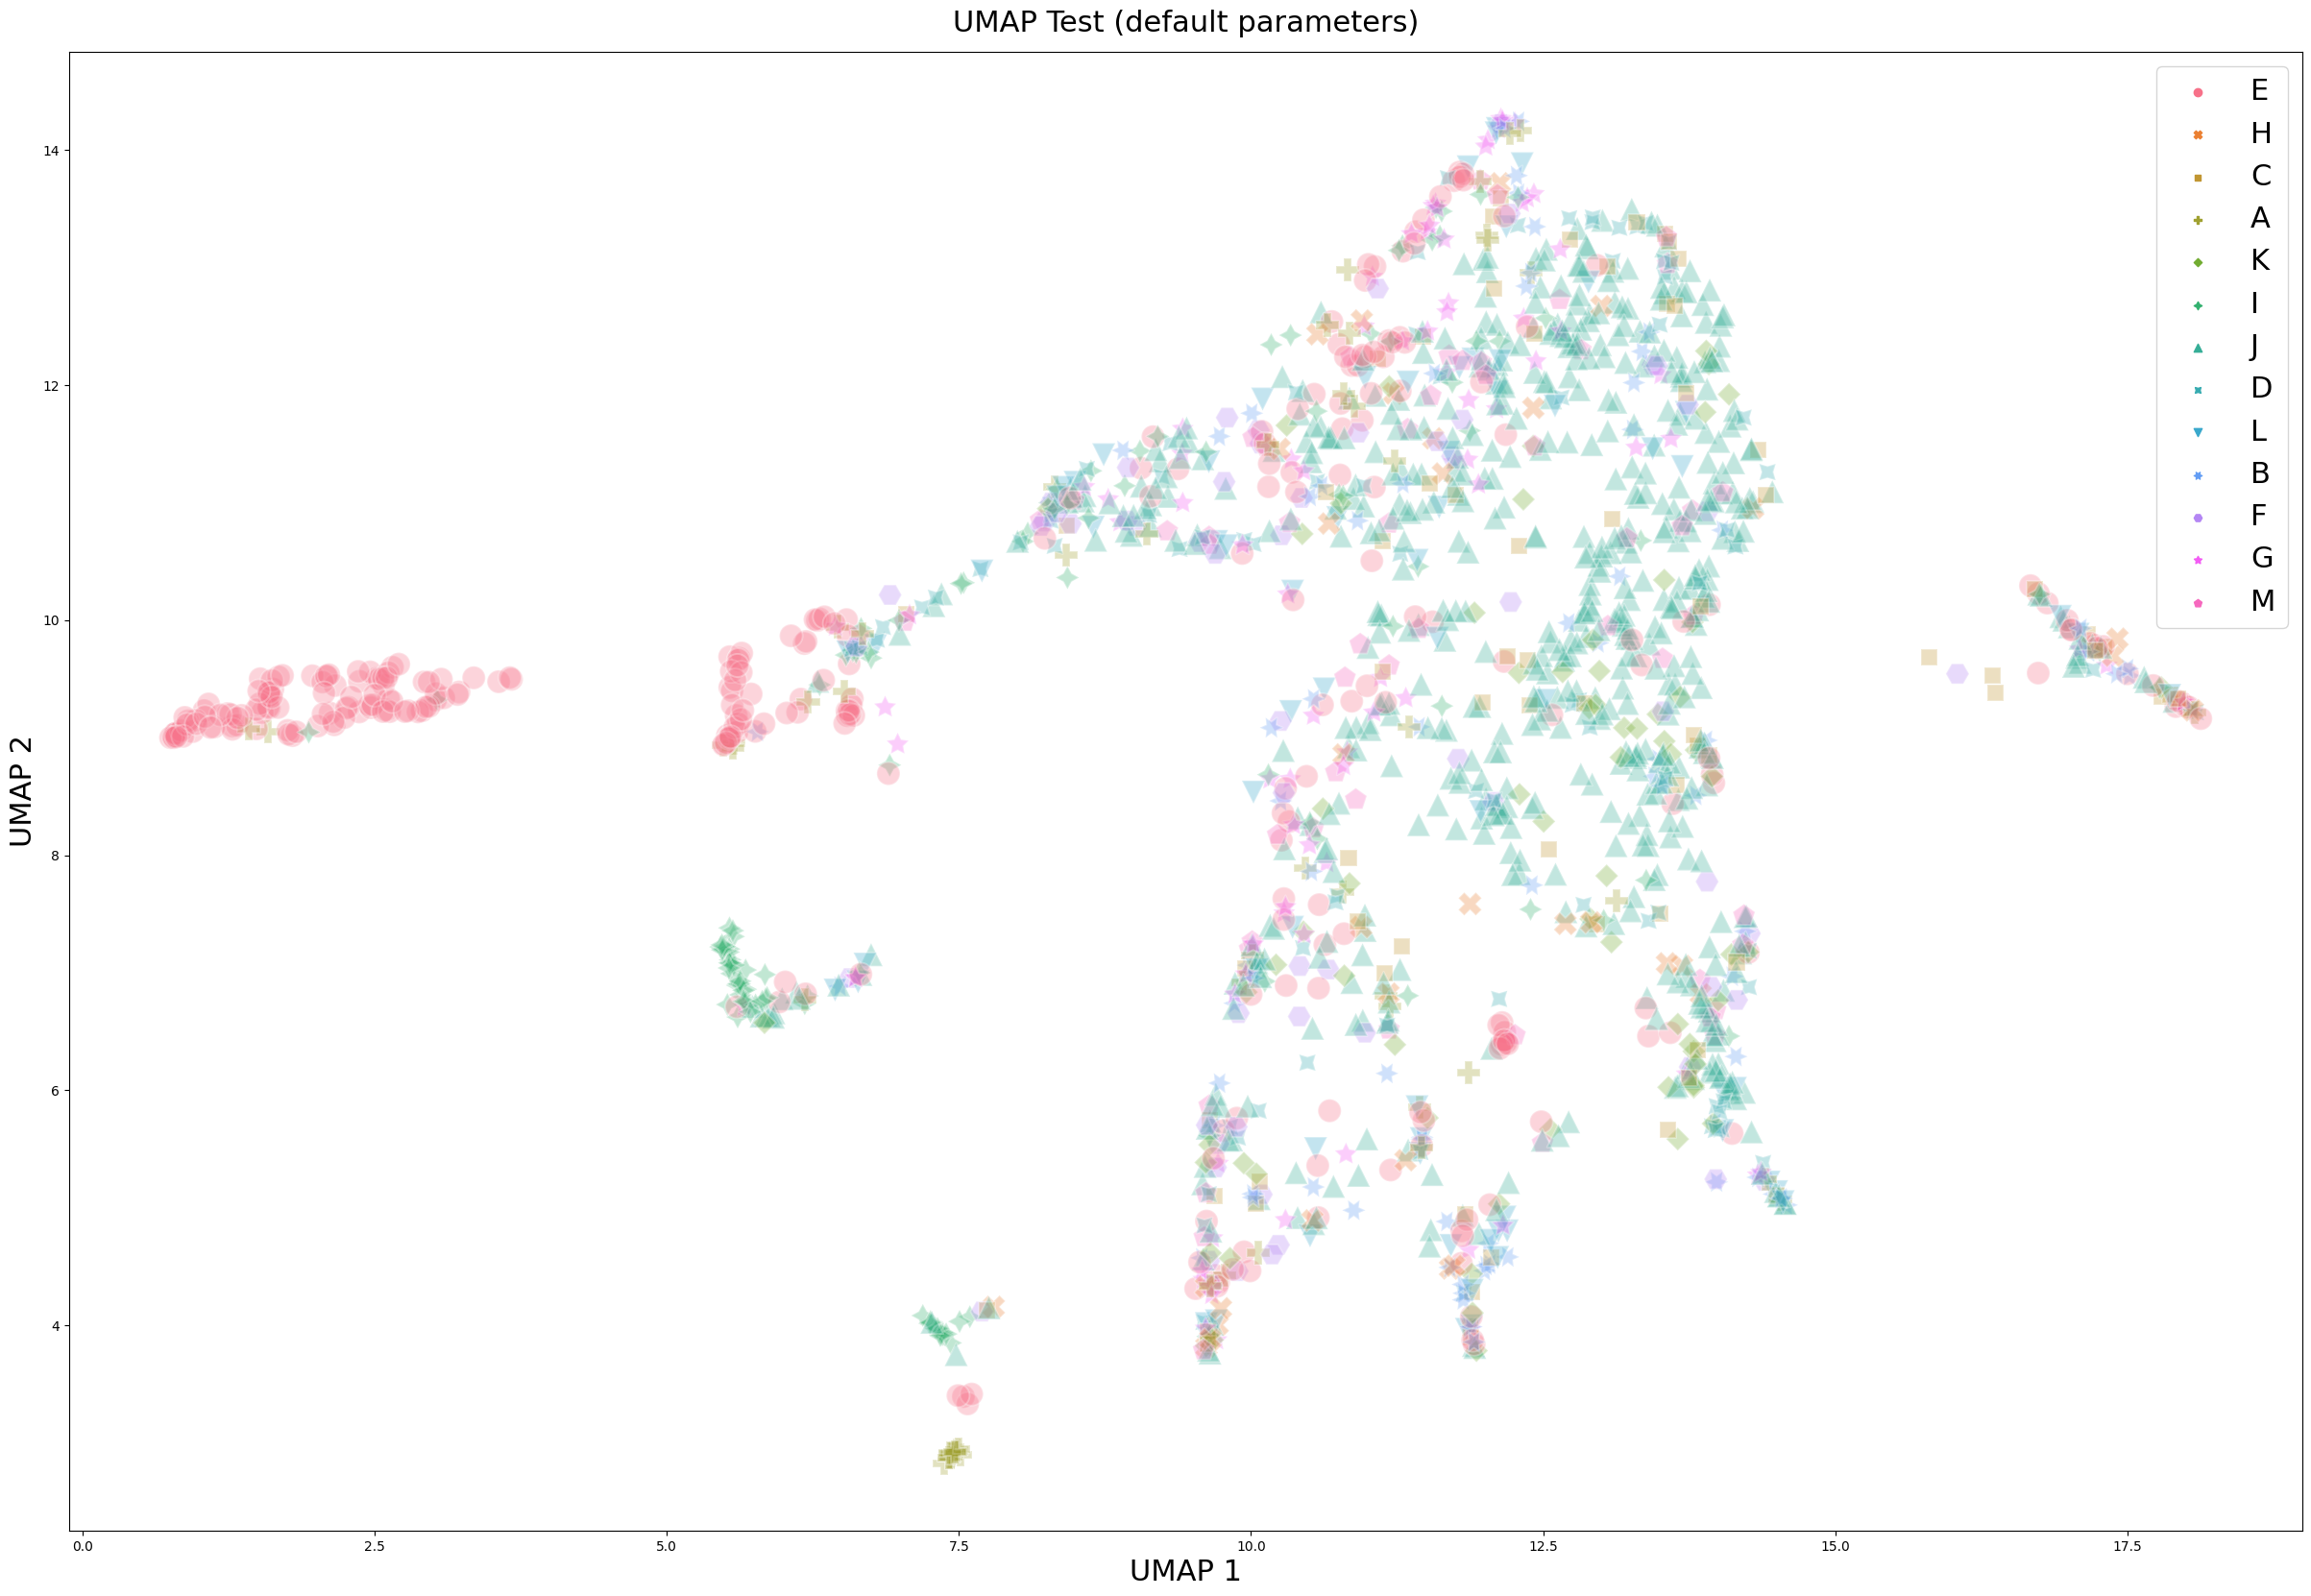

kaggle_data/test_data.csv shape: (1732, 669)
kaggle_data/test_data.csv sample:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z216,z217,z218,z219,z220,z221,z222,subject,phase,state
0,0,0,0,1,4.665949,0.083412,-17.397081,0.067865,0.005895,0.000012,...,-0.017574,-0.004402,0.016508,-540.645279,-1511.001159,-1408.385976,-437.807290,E,4,D
1,0,0,0,0,-398.299487,0.784032,-10.785768,403.784446,0.070405,0.000180,...,0.029533,0.113692,0.088024,-3.140961,-0.658456,-0.140010,-0.011017,H,4,D
2,0,0,0,1,-380.902140,0.671324,-9.265829,361.841929,0.006937,0.000025,...,-0.006361,0.005852,-0.003745,-14.340790,4.182214,-0.549953,0.019553,C,4,B
3,0,0,0,1,-342.784124,0.469414,-8.044287,293.043601,0.007217,-0.000021,...,0.001950,-0.003426,-0.011191,251.659680,-441.129598,256.986592,-49.745359,H,1,C
4,0,0,0,1,6.248502,0.252336,-5.398056,0.110097,0.005573,0.000010,...,-0.001916,-0.015666,-0.015960,-137.847658,-377.758402,-345.673251,-105.633150,E,4,B
5,0,0,0,0,-342.702796,0.606746,-11.159337,304.690373,0.104638,0.000836,...,-0.156872,-0.132088,-0.230155,-0.575899,-0.031580,-0.200320,-0.085925,A,4,C
6,0,0,0,0,-376.592701,1.683716,-5.033725,354.017833,0.013077,0.000037,...,-0.021803,-0.003364,-0.007180,-3.409340,-3.012209,-0.875127,-0.082578,K,3,C
7,0,0,0,1,-79.064968,2.809317,-2.111964,15.759738,0.007566,-0.000065,...,-0.007910,-0.001250,0.001167,90.752120,-249.127366,227.270112,-68.914149,E,1,A
8,0,0,0,1,-397.872078,0.608723,-7.328161,395.634272,0.018238,0.000184,...,-0.059589,-0.009416,-0.043956,-4.110985,-1.397745,-0.150994,-0.004488,H,4,C
9,0,0,0,1,-229.052039,2.383609,-1.995115,130.872711,0.006023,-0.000062,...,-0.031619,-0.003678,-0.000354,-881.472426,-1527.268595,-882.412185,-170.011527,I,4,B


In [8]:
numeric_subset = test_data.drop(['subject', 'state', 'phase'], axis = 1)
reducer = umap.UMAP()
embedding_UMAP = reducer.fit_transform(numeric_subset)
embedding_UMAP.shape

# compute and graph MDs
plt.figure(figsize = (30, 20))
sns.scatterplot(x=embedding_UMAP [:, 0], y=embedding_UMAP [:, 1],
                hue = test_data['subject'], style = test_data['subject'],
                s = 300, alpha = 0.3)
plt.title('UMAP Test (default parameters)', pad = 15, fontsize=22)
plt.xlabel('UMAP 1', fontsize=22)
plt.ylabel('UMAP 2', fontsize=22)
plt.legend(fontsize='22')
plt.show()

# Restore data prior to dropping for UMAP plot
test_data = load_data('kaggle_data/test_data.csv', False)

In [9]:
"""
Duplicating subjects I and A for E
Duplicating subjects F and C for J
"""

# Balance data into equal output types
train_A = train_data[train_data['subject'] == 'A'].index
train_C = train_data[train_data['subject'] == 'C'].index
train_F = train_data[train_data['subject'] == 'F'].index
train_I = train_data[train_data['subject'] == 'I'].index

# Draw random rows from train data
random_A = np.random.choice(train_A, size=50, replace=False)
random_C = np.random.choice(train_C, size=50, replace=False)
random_F = np.random.choice(train_F, size=50, replace=False)
random_I = np.random.choice(train_I, size=100, replace=False)

# Update subject to new subject values
rows_A = train_data.loc[random_A]
rows_A['subject'] = 'E'
rows_C = train_data.loc[random_C]
rows_C['subject'] = 'J'
rows_F = train_data.loc[random_F]
rows_F['subject'] = 'J'
rows_I = train_data.loc[random_I]
rows_I['subject'] = 'E'

# Add new rows to data
df_new_subjects = pd.DataFrame()
df_new_subjects = pd.concat([train_data, rows_A, rows_C, rows_F, rows_I])
df_new_subjects = df_new_subjects.reset_index(drop = True)
train_data = df_new_subjects

### UMAP summary
Since we discovered subject E and J were missing in the train data, and E and J subjects comprised about 50% of the test data, we had to somehow include E and J subjects in the train data set. By reviewing UMAP, we determined where clusters gathered around subjects E and J. There was no clear-cut winner. We tested with different subject values around subjects E and J. For the subjects selected to mimic E and J in the train data, those subjects' observations were randomly selected, duplicated in the train data set, then renamed to the missing subject labels E and J.

## Feature evalution

### Standard deviation check

In [10]:
train_data = reduce_by_std_dev(train_data)
test_data = balance_features(train_data, test_data)

Train data size before standard devation reduction:	(4834, 670)
Train data size after standard deviation reduction:	(4834, 562)
Test data size after balancing:	(1732, 561)


### VIF

In [11]:
train_data = reduce_by_VIF(train_data)
test_data = balance_features(train_data, test_data)

Data size before VIF reduction:	(4834, 562)
Train data size after VIF reduction:	(4834, 127)
Test data size after balancing:	(1732, 126)


### Backward selection

In [12]:
train = train_data.copy()
train = balance_data(train)
test = test_data.copy()
cols = ['subject', 'phase', 'state']
for col in cols:
    if col in train.columns:
        train.drop(col, axis=1, inplace=True)
    if col in test.columns:
        test.drop(col, axis=1, inplace=True)

train_labels = train['output']
train.drop('output', axis=1, inplace=True)

# determining mean importance over iterations 
feature_selection = pd.DataFrame(train.columns, columns = ['features'])
for i in range(backward_iterations):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2)

    # fit model on all training data
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data and evaluate
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
    column_name = str(i)
    feature_selection[column_name] = model.feature_importances_

feature_selection.set_index(['features'], inplace=True)
feature_selection['mean'] = feature_selection.mean(axis = 1)
feature_selection = feature_selection.sort_values(by=['mean'])
feature_selection = feature_selection.loc[feature_selection["mean"] > 0]
thresholds = feature_selection['mean']


index = []
iteration_array = [] 

# removing features iteratively and computing accuracy over iterations 
feature_pruning = pd.DataFrame(feature_selection.index, columns = ['features'])
feature_pruning['mean importance'] = feature_selection['mean'].values
for j in range(backward_iterations):
    acc_array = [] 
    for i in range(len(feature_selection)):
        X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2)
        X_train_sub = X_train[feature_selection.index[i:]]
        X_test_sub = X_test[feature_selection.index[i:]]
        model.fit(X_train_sub, y_train)
        y_pred = model.predict(X_test_sub)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        acc_array.append(accuracy)
#             print("n=%d, Accuracy: %.7f%%" % (X_train_sub.shape[1], accuracy*100.0))
    column_name = 'acc_' + str(j)
    feature_pruning[column_name] = acc_array
    feature_selection['acc'] = acc_array
    print(f'Iteration for removal {j}')

Test Accuracy: 59.17%
Test Accuracy: 51.67%
Test Accuracy: 67.50%
Test Accuracy: 66.67%
Test Accuracy: 56.67%
Test Accuracy: 63.33%
Test Accuracy: 59.17%
Test Accuracy: 62.50%
Test Accuracy: 55.00%
Test Accuracy: 67.50%
Iteration for removal 0
Iteration for removal 1
Iteration for removal 2
Iteration for removal 3
Iteration for removal 4
Iteration for removal 5
Iteration for removal 6
Iteration for removal 7
Iteration for removal 8
Iteration for removal 9


In [13]:
# accuracy of feature listed and all those above (sorted by ascending importance) dataframe 
feature_pruning['acc_mean'] = feature_pruning.iloc[:,-10:].mean(axis = 1)
feature_pruning = feature_pruning.reset_index()
# index that maximizes mean accuracy (will take this index and all indicies below as import features
idx = feature_pruning['acc_mean'].argmax()

train_data_numeric_subset = train_data[feature_selection.index[idx:]]
test_data_numeric_subset = balance_features(train_data_numeric_subset, test_data.copy())

print(train_data_numeric_subset.shape)
print(train.shape)
print(train_data.shape)

train_data = pd.concat([train_data_numeric_subset, train_data[['subject', 'state', 'phase', 'output']]], axis = 1)
test_data2 = pd.concat([test_data_numeric_subset, test_data[['subject', 'state', 'phase']]], axis = 1)

print(f'Train Data shape {train_data.shape}; Test Data shape {test_data2.shape}')
display(train_data.head(10))

Test data size after balancing:	(1732, 19)
(4834, 19)
(600, 123)
(4834, 127)
Train Data shape (4834, 23); Test Data shape (1732, 22)


,z11,z204,y10,z140,x202,z208,z221,y67,y203,x7,...,y70,y133,z69,x112,y202,z112,subject,state,phase,output
0,-3.470000e-05,0.015053,-0.000170,0.900249,0.008060,0.062382,3.530736,34,0.004731,-1.987520,...,42,0.104738,96,-0.619000,0.004234,0.597755,K,C,3,1
1,-5.180000e-06,-0.009052,-0.000177,0.850374,0.021699,0.003132,-0.699268,23,0.030721,-6.933765,...,44,0.107232,90,-0.949478,0.025937,-0.159940,A,C,4,1
2,-1.036650e-04,0.100816,-0.000082,0.900249,0.376239,-0.167468,-17.008130,31,0.059543,-2.581162,...,46,0.154613,84,0.470873,0.101127,0.972803,D,C,3,1
3,-2.590000e-05,-0.000647,-0.000226,0.635910,0.000978,0.247985,-0.153956,33,0.000711,-2.510799,...,53,0.122195,128,-0.948266,0.001026,0.210023,G,C,2,0
4,-1.990000e-05,0.021547,-0.000493,0.900249,0.010125,-0.073768,-1.281361,36,0.013191,-3.726368,...,41,0.047382,97,-0.855603,0.010631,0.397851,C,C,2,1
5,4.210000e-06,-0.007371,0.000303,0.860349,0.002207,0.195602,-0.918143,29,0.000755,-6.065442,...,42,0.082294,91,-0.977028,0.027740,-0.110797,G,B,1,1
6,-2.240000e-05,0.043093,-0.000039,0.900249,0.000133,-0.120906,2.218396,34,0.001057,-10.260082,...,50,0.099751,102,-0.881096,0.000069,0.429632,C,B,3,1
7,-4.150000e-08,0.054891,0.000006,0.900249,0.000352,0.062926,-238.433744,34,0.000158,-2.740189,...,57,0.102244,114,-0.834316,0.000144,0.526499,C,C,3,0
8,8.600000e-05,-0.041030,-0.000161,0.845387,0.082959,0.179105,-0.392590,33,0.057377,-4.058816,...,39,0.099751,82,-0.910405,0.247444,-0.223109,I,D,1,1
9,3.750000e-05,-0.082549,-0.000440,0.892768,0.126819,0.199413,-0.319102,21,0.018199,-5.889740,...,36,0.099751,55,0.484678,0.224593,-0.512767,I,B,4,1


### Create dummy variables

In [14]:
train_data, test_data = create_dummies(train_data, test_data, ['subject', 'phase', 'state'])
print(f'Train Data shape {train_data.shape}')
display(train_data.head(10))
print(f'Test Data shape {test_data.shape}')
display(test_data.head(10))

Train Data shape (4834, 42)


,z11,z204,y10,z140,x202,z208,z221,y67,y203,x7,...,subject_M,phase_1,phase_2,phase_3,phase_4,state_A,state_B,state_C,state_D,state_E
0,-3.470000e-05,0.015053,-0.000170,0.900249,0.008060,0.062382,3.530736,34,0.004731,-1.987520,...,0,0,0,1,0,0,0,1,0,0
1,-5.180000e-06,-0.009052,-0.000177,0.850374,0.021699,0.003132,-0.699268,23,0.030721,-6.933765,...,0,0,0,0,1,0,0,1,0,0
2,-1.036650e-04,0.100816,-0.000082,0.900249,0.376239,-0.167468,-17.008130,31,0.059543,-2.581162,...,0,0,0,1,0,0,0,1,0,0
3,-2.590000e-05,-0.000647,-0.000226,0.635910,0.000978,0.247985,-0.153956,33,0.000711,-2.510799,...,0,0,1,0,0,0,0,1,0,0
4,-1.990000e-05,0.021547,-0.000493,0.900249,0.010125,-0.073768,-1.281361,36,0.013191,-3.726368,...,0,0,1,0,0,0,0,1,0,0
5,4.210000e-06,-0.007371,0.000303,0.860349,0.002207,0.195602,-0.918143,29,0.000755,-6.065442,...,0,1,0,0,0,0,1,0,0,0
6,-2.240000e-05,0.043093,-0.000039,0.900249,0.000133,-0.120906,2.218396,34,0.001057,-10.260082,...,0,0,0,1,0,0,1,0,0,0
7,-4.150000e-08,0.054891,0.000006,0.900249,0.000352,0.062926,-238.433744,34,0.000158,-2.740189,...,0,0,0,1,0,0,0,1,0,0
8,8.600000e-05,-0.041030,-0.000161,0.845387,0.082959,0.179105,-0.392590,33,0.057377,-4.058816,...,0,1,0,0,0,0,0,0,1,0
9,3.750000e-05,-0.082549,-0.000440,0.892768,0.126819,0.199413,-0.319102,21,0.018199,-5.889740,...,0,0,0,0,1,0,1,0,0,0


Test Data shape (1732, 145)


,x4,x7,x10,x11,x17,x18,x20,x21,x40,x41,...,subject_M,phase_1,phase_2,phase_3,phase_4,state_A,state_B,state_C,state_D,state_E
0,1,-17.397081,0.000012,-2.090000e-05,0.034087,0.327009,9,13,1,1,...,0,0,0,0,1,0,0,0,1,0
1,0,-10.785768,0.000180,-5.890000e-05,-0.319843,-0.281809,11,11,1,1,...,0,0,0,0,1,0,0,0,1,0
2,1,-9.265829,0.000025,-5.380000e-06,0.337449,0.615012,12,12,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,-8.044287,-0.000021,9.040000e-06,-0.257195,-0.010352,10,15,1,1,...,0,1,0,0,0,0,0,1,0,0
4,1,-5.398056,0.000010,5.300000e-07,0.047862,-0.299650,8,8,1,1,...,0,0,0,0,1,0,1,0,0,0
5,0,-11.159337,0.000836,-1.030000e-05,-0.442773,-0.303944,10,11,1,1,...,0,0,0,0,1,0,0,1,0,0
6,0,-5.033725,0.000037,-2.320000e-05,0.144888,1.005144,57,21,1,1,...,0,0,0,1,0,0,0,1,0,0
7,1,-2.111964,-0.000065,-4.790000e-05,-1.244601,1.181850,57,57,1,1,...,0,1,0,0,0,1,0,0,0,0
8,1,-7.328161,0.000184,9.130000e-05,-0.301193,7.204531,10,10,1,0,...,0,0,0,0,1,0,0,1,0,0
9,1,-1.995115,-0.000062,-1.900000e-05,0.040029,-0.142998,28,34,1,1,...,0,0,0,0,1,0,1,0,0,0


### Boruta

In [15]:
train_copy = train_data.copy()
labels_copy = train_copy['output']
train_copy.drop('output', axis=1, inplace=True)

# Parameters for each model chosen based on previous bootstrap runs
if run_model == 'RandomForest':
    test_model = RandomForestClassifier(criterion='entropy', n_estimators=1000, max_depth=36)

elif run_model == 'Tree':      
    test_model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6)

elif run_model == 'XGBoost':
    test_model = xgb.XGBClassifier()

elif run_model == 'LogisticRegression':
    test_model = LogisticRegression(penalty='l2', solver='liblinear', C=15.0, max_iter=100,
                                    l1_ratio=0.5)

else:
    raise ValueError(f'Unknown model ({run_model}). Allowed values: \
                     [RandomForest, Tree, XGBoost, LogisticRegression]')

test_model.fit(train_copy, labels_copy)

# define Boruta feature selection method
feat_selector = BorutaPy(test_model, n_estimators='auto', verbose=1)


# find all relevant features
feat_selector.fit(np.array(train_copy), np.array(labels_copy))

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# # call transform() on X to filter it down to selected features
# train_copy_filtered = feat_selector.transform(train_copy)

# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(train_copy.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

for feat in feature_ranks:
    if feat[1] > 25:
        # Drop feature with a ranking below 25
        feature_columns_drop.append(feat[0])

print(len(feature_columns_drop))

# Remove weak features
for col in feature_columns_drop:
    if (col != 'output') and (col in train_data.columns):
        train_data.drop(col, axis=1, inplace=True)
test_data = balance_features(train_data, test_data.copy())

print(f'Train Data shape ({train_data.shape}); Test Data shape ({test_data.shape})')

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

### BorutaShap

  0%|          | 0/100 [00:00<?, ?it/s]

14 attributes confirmed important: ['z112', 'subject_F', 'z204', 'subject_C', 'y203', 'x7', 'subject_M', 'subject_G', 'z202', 'phase_1', 'z69', 'x112', 'phase_2', 'x17']
22 attributes confirmed unimportant: ['y7', 'state_B', 'subject_J', 'subject_H', 'z221', 'z11', 'state_D', 'subject_D', 'x202', 'subject_B', 'subject_E', 'subject_I', 'subject_A', 'z208', 'subject_K', 'phase_3', 'y70', 'phase_4', 'y67', 'subject_L', 'y133', 'y10']
1 tentative attributes remains: ['y202']


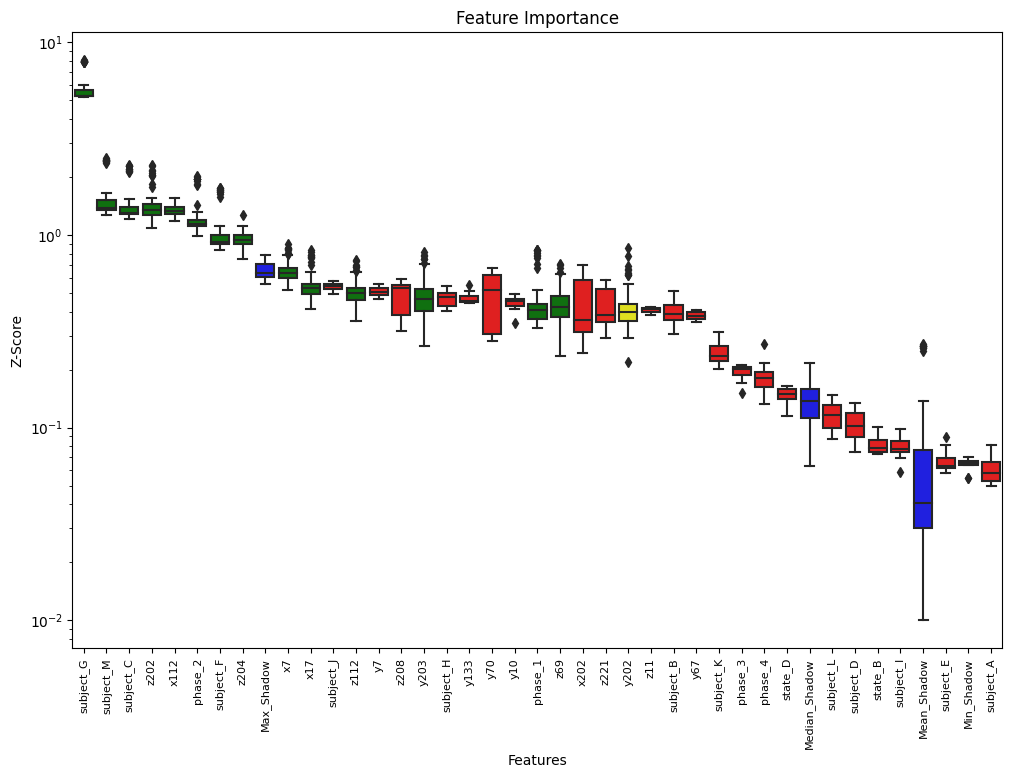

  0%|          | 0/100 [00:00<?, ?it/s]

11 attributes confirmed important: ['z112', 'subject_K', 'z204', 'y202', 'subject_M', 'x7', 'subject_G', 'z202', 'z69', 'x112', 'phase_2']
26 attributes confirmed unimportant: ['subject_F', 'y7', 'y203', 'state_B', 'subject_J', 'subject_H', 'z221', 'z11', 'state_D', 'subject_D', 'x202', 'subject_B', 'subject_E', 'subject_I', 'x17', 'subject_A', 'z208', 'phase_1', 'phase_3', 'y70', 'phase_4', 'y67', 'subject_L', 'subject_C', 'y133', 'y10']
0 tentative attributes remains: []


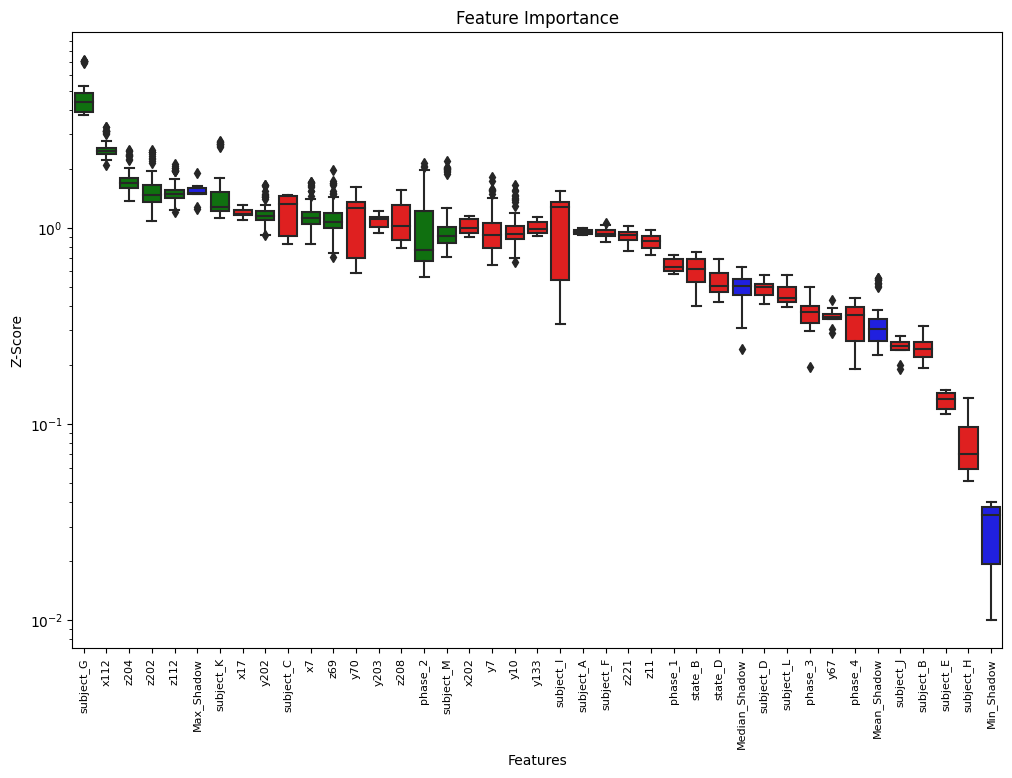

In [16]:

# no model selected default is Random Forest, if classification is True it is a Classification problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

'''
Sample: Boolean
    if true then a rowise sample of the data will be used to calculate the feature importance values

sample_fraction: float
    The sample fraction of the original data used in calculating the feature importance values only
        used if Sample==True.

train_or_test: string
    Decides whether the feature improtance should be calculated on out of sample data see the dicussion here.
        https://compstat-lmu.github.io/iml_methods_limitations/pfi-data.html#introduction-to-test-vs.training-data

normalize: boolean
            if true the importance values will be normalized using the z-score formula

verbose: Boolean
    a flag indicator to print out all the rejected or accepted features.
'''
train_data_labels = train_data['output']
train_data.drop('output', axis=1, inplace=True)
Feature_Selector.fit(X=train_data, y=train_data_labels, n_trials=100, sample=False,
                     train_or_test = 'train', normalize=True, verbose=True)

# Returns Boxplot of features
Feature_Selector.plot(which_features='all')
model = xgb.XGBClassifier(n_estimators=435, max_depth=13, colsample_bylevel=0.7,
                                       colsample_bytree=0.8, learning_rate=0.1, reg_lambda=0.8,
                                       scale_pos_weight = 0.18357862)

# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=train_data, y=train_data_labels, n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True, verbose=True)

# Returns Boxplot of features
Feature_Selector.plot(which_features='all')

train_data['output'] = train_data_labels

## Feature evaluation summary
<table>
    <tr><th style="text-align: left; font-size: 14px;">Standard deviation</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">Features that are constant throughout samples of the training set cannot information to help the model discriminate between classes. As a result, all features with a standard deviation of 0 were dropped from this data. This was approximately 10% of our data.<td></tr>
    <tr><th style="text-align: left; font-size: 14px;">VIF (multicolinearity)</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">The original data had many features. The VIF library in Python allowed us to analyze which features had the most variance inflation. The thresholds were set at 1, 2, 3, 4, 4.5 and 5. We saw the best results from Kaggle on the unknown test set at 4.5 VIF level. That means any feature greater than variance inflation of 4.5 was discarded. VIF measures multicollinearity of features - in other words, redundancy. Only about 20% of the original features seemed to be independent of the other features.<td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Backward selection</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">After standard deviation and VIF filtering (optional), backward selection for the XGBoost model (which we found to be the most informative) was implemented. In this step, the XGBoost model provided and average feature importance (ten iterations) for all features inputted in the training set. These features were then ranked and removed (from lowest to highest) while measuring mean accuracy (10 iterations). The top X features with the highest accuracy was choosen as the final features to use for modeling and hyperparameter tuning. This led to 62 numeric features while preserving all cateogrical information (one hot encoded).<td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Dummy variables for categorical features</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">At first attempt with the models, the categorical values - namely subject, state and phase - were removed from the training and test data. Most of the models tested could not run with non-numeric data. To get the models to run at all, we removed these columns. It turns out the predictions were not very accurate without categorical values. To solve this issue, the categorical values were set to dummy values, or one-hot encoding. The predictions' accuracies increased with the categorical values, so this approach was built into the standard evaluation.<td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Boruta</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">After the previous feature selection, the Boruta library ran on the remaining features to determine which of those values would contribute greatest to the output labels. By running Boruta on the entire data set, too many features rendered the plots and results too noisy. Boruta gave more intelligable results after running the standard deviation check, VIF and backward selection. From here, we could better see the relationships of the remaining features and if they shadowed each other.<td></tr>
</table>

## Data adjustments

### Balance data

In [17]:
train_data = balance_data(train_data)
print(f'Balanced train data shape: {train_data.shape}')
print(f'Balanced train data head:')
display(train_data.head(10))

Balanced train data shape: (600, 38)
Balanced train data head:


,z11,z204,y10,x202,z208,z221,y67,y203,x7,x17,...,subject_K,subject_L,subject_M,phase_1,phase_2,phase_3,phase_4,state_B,state_D,output
4693,-2.640000e-05,-0.005180,-0.001120,0.011145,0.096139,-0.076807,35,0.012061,-9.536482,0.011273,...,0,0,0,0,0,1,0,0,1,0
1159,-2.440000e-05,0.005728,-0.000654,0.001553,0.115493,-5.286379,32,0.002235,-1.287295,1.298560,...,0,0,0,0,1,0,0,0,0,0
2800,8.840000e-06,0.156411,0.000008,0.000517,0.120870,-2661.606847,48,0.000210,-4.666642,0.036755,...,0,1,0,1,0,0,0,0,0,0
4580,-3.040000e-05,0.057628,0.000019,0.000586,0.006573,-34.886117,31,0.000063,-3.452718,0.012424,...,0,0,1,0,1,0,0,0,0,0
4304,-2.420000e-05,0.000681,-0.000085,0.007542,0.150042,-0.013358,27,0.003842,-6.237519,-0.810143,...,0,0,1,0,0,1,0,0,0,0
3382,7.720000e-07,0.045695,-0.000020,0.000121,0.101421,-91.845794,46,0.000046,-4.296525,0.010835,...,0,0,0,1,0,0,0,1,0,0
3312,2.860000e-05,0.004865,0.000086,0.000137,0.136487,-31.506904,44,0.000057,-0.651311,-0.049316,...,0,0,0,0,1,0,0,1,0,0
2878,7.080000e-05,-0.009806,-0.000021,0.012638,0.007762,-0.526322,39,0.007586,-5.276793,-0.369081,...,0,1,0,0,1,0,0,0,1,0
1256,7.360000e-05,-0.001114,0.000480,0.002110,0.163858,-0.107149,33,0.001757,0.365763,0.641925,...,0,0,0,1,0,0,0,0,0,0
1144,-2.580000e-06,-0.003600,-0.000462,0.005203,0.199002,-0.156437,36,0.000580,-0.532507,-1.369831,...,0,0,0,1,0,0,0,1,0,0


### Balance data summary
<h4>(undersampling)</h4>
<p>The XGBoost model performs best when it has training data with equal output observations. The train data set had a bout a 3:1 ration of 1's to 0's, with respect to output. We wrote a function that randomly selected observations with 1 as output to match the number of observations with 0 as output. This was done in hopes that the ensuing model didn't build its weights too heavily on the 1 output. This approach had a negligible performance than with unbalanced data, but we felt comfortable to keep the approach in for final prediction.</p><p>The second part of balancing data (which we found to be extremely important) was taking multiple different combinations of balanced data samples (downsampling from the majority class). After finding our optimal features and hyperparameters we ran our final model through multiple iterations, switching up the balanced data used to train the model. For each iteration, we saved the probabilities the model outputted and took an average of all probabilities across samples and iterations as our final submission. This allowed us to take into account multiple different ways our model may have varied depending on the downsampled balanced data we inputted. By taking in many iterations, we decreased any model or predictive variability.</p>

### Oversampling

In [18]:
print(f'Running imblearn version: {imblearn.__version__}')
train_data_labels = train_data['output']
train_data.drop(['output'], axis=1, inplace=True)
train_data, train_data_labels = (
    generate_oversampling(oversampling_method, train_data, train_data_labels)
)
train_data['output'] = train_data_labels

Running imblearn version: 0.10.1
Before SMOTE: Counter({0: 300, 1: 300})
SMOTE(), (600, 37)
After SMOTE: Counter({0: 300, 1: 300})


### Oversampling summary
<h4>SMOTE, ADASYN, SMOTETomek, SMOTEENN</h4>
<p>While undersampling provides a balance between the majority and minority class, the limitation is the number of samples inputted into the model. SMOTE helps with this by generating synthetic data by mapping the data into the feature space, overlaying class values, and interpolating new features for the minority class feature space. ADASYN (Adaptive synethetic), SMOTETomek (Over-sampling using SMOTE and cleaning using Tomek links), and SMOTEENN (combine over- and under-sampling using SMOTE and Edited Nearest Neighbours) were also strategies used to increase data in the minority class.</p>

## Final data preparation

### Create labels/final train data shape

In [19]:
train_data_labels = train_data['output']

# Review output distribution
print(f'Number of 0 labels ({list(train_data_labels).count(0)})')
print(f'Number of 1 labels ({list(train_data_labels).count(1)})')

print(f'Train data shape: {train_data.shape}')
print('Train data head:')
display(train_data.head(10))

Number of 0 labels (300)
Number of 1 labels (300)
Train data shape: (600, 38)
Train data head:


,z11,z204,y10,x202,z208,z221,y67,y203,x7,x17,...,subject_K,subject_L,subject_M,phase_1,phase_2,phase_3,phase_4,state_B,state_D,output
0,-2.640000e-05,-0.005180,-0.001120,0.011145,0.096139,-0.076807,35,0.012061,-9.536482,0.011273,...,0,0,0,0,0,1,0,0,1,0
1,-2.440000e-05,0.005728,-0.000654,0.001553,0.115493,-5.286379,32,0.002235,-1.287295,1.298560,...,0,0,0,0,1,0,0,0,0,0
2,8.840000e-06,0.156411,0.000008,0.000517,0.120870,-2661.606847,48,0.000210,-4.666642,0.036755,...,0,1,0,1,0,0,0,0,0,0
3,-3.040000e-05,0.057628,0.000019,0.000586,0.006573,-34.886117,31,0.000063,-3.452718,0.012424,...,0,0,1,0,1,0,0,0,0,0
4,-2.420000e-05,0.000681,-0.000085,0.007542,0.150042,-0.013358,27,0.003842,-6.237519,-0.810143,...,0,0,1,0,0,1,0,0,0,0
5,7.720000e-07,0.045695,-0.000020,0.000121,0.101421,-91.845794,46,0.000046,-4.296525,0.010835,...,0,0,0,1,0,0,0,1,0,0
6,2.860000e-05,0.004865,0.000086,0.000137,0.136487,-31.506904,44,0.000057,-0.651311,-0.049316,...,0,0,0,0,1,0,0,1,0,0
7,7.080000e-05,-0.009806,-0.000021,0.012638,0.007762,-0.526322,39,0.007586,-5.276793,-0.369081,...,0,1,0,0,1,0,0,0,1,0
8,7.360000e-05,-0.001114,0.000480,0.002110,0.163858,-0.107149,33,0.001757,0.365763,0.641925,...,0,0,0,1,0,0,0,0,0,0
9,-2.580000e-06,-0.003600,-0.000462,0.005203,0.199002,-0.156437,36,0.000580,-0.532507,-1.369831,...,0,0,0,1,0,0,0,1,0,0


### Final check before running models

In [20]:
# Ensure both data sets have the same features after adding dummies
# Since test has more subjects, there are more test dummy variables
train_features = train_data.shape[1]
test_features = test_data.shape[1]
if train_features != test_features:
    # Remove test data columns
    for col in test_data.columns:
        if col not in train_data.columns:
            test_data.drop(col, axis=1, inplace=True)

    # Remove train data columns
    for col in train_data.columns:
        if col not in test_data.columns:
            train_data.drop(col, axis=1, inplace=True)

print(f'Train Data shape {train_data.shape}; Test Data shape {test_data.shape}')

# Final check
train_features = train_data.shape[1]
test_features = test_data.shape[1]
if train_features != test_features:
    raise ValueError('Uneven data sets')

Train Data shape (600, 37); Test Data shape (1732, 37)


## Model tests

### XGBoost model optimization

#### n_estimators

In [21]:
"""
Find best n_estimators based on accuracy
"""
df_n_estimators = pd.DataFrame()
for n_estimator in np.arange(5, 255, step=5):
    df_n_estimators = pd.concat([
        df_n_estimators, run_xgb_model(
            train_data, None, train_data_labels, False, n_estimator
        )
    ])
avg_metrics, best_n_estimators = print_metrics(df_n_estimators, 'n_estimators')
best_n_estimators = int(best_n_estimators)
display(avg_metrics)
print(f'Best n estimators: {best_n_estimators}')

Best accuracy 48    245.0
Name: n_estimators, dtype: float64


,n_estimators,accuracy,precison,recall,total_metric,average_process_time
0,5.0,0.586333,0.946112,0.190606,1.723051,0.011680
1,10.0,0.596333,0.964834,0.196980,1.758147,0.012146
2,15.0,0.600500,0.976965,0.207957,1.785421,0.012254
3,20.0,0.600500,0.972338,0.207219,1.780057,0.013445
4,25.0,0.596000,0.978105,0.197967,1.772072,0.014770
5,30.0,0.596833,0.983616,0.193265,1.773715,0.016096
6,35.0,0.596417,0.970729,0.202872,1.770018,0.017682
7,40.0,0.598333,0.980440,0.207766,1.786539,0.018841
8,45.0,0.601000,0.981742,0.205489,1.788231,0.021740
9,50.0,0.599083,0.977545,0.206275,1.782903,0.023836


Best n estimators: 245


#### max_depth

In [22]:
"""
Find best max_depth based on accuracy
"""
df_max_depth = pd.DataFrame()
for max_depth in np.arange(2, 21, step=1):
    df_max_depth = pd.concat([
        df_max_depth, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators, max_depth
        )
    ])
avg_metrics, best_max_depth = print_metrics(df_max_depth , 'max_depth')
best_max_depth = int(best_max_depth)
display(avg_metrics)
print(f'Best max depth: {best_max_depth}')

Best accuracy 8    10.0
Name: max_depth, dtype: float64


,max_depth,accuracy,precison,recall,total_metric,average_process_time
0,2.0,0.602750,0.977862,0.203335,1.783948,0.065304
1,3.0,0.634500,0.950294,0.280697,1.865491,0.079123
2,4.0,0.652000,0.943358,0.338563,1.933921,0.094956
3,5.0,0.669750,0.954176,0.357130,1.981056,0.113260
4,6.0,0.679167,0.935084,0.394810,2.009061,0.142173
5,7.0,0.692417,0.921934,0.426123,2.040473,0.159056
6,8.0,0.693500,0.910050,0.436258,2.039809,0.172408
7,9.0,0.704417,0.913024,0.459565,2.077005,0.189241
8,10.0,0.712750,0.904450,0.481233,2.098433,0.201459
9,11.0,0.704667,0.895284,0.467314,2.067265,0.211246


Best max depth: 10


#### colsample_bylevel

In [23]:
"""
Find best colsample_bylevel based on accuracy
"""
df_colsample_bylevel = pd.DataFrame()
for colsample_bylevel in np.arange(.1, 1, step =.05):
    colsample_bylevel = round(colsample_bylevel, 2)
    df_colsample_bylevel = pd.concat([
        df_colsample_bylevel, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators,
            best_max_depth, colsample_bylevel
        )
    ])
avg_metrics, best_colsample_bylevel = print_metrics(df_colsample_bylevel, 'colsample_bylevel')
best_colsample_bylevel = float(best_colsample_bylevel)
display(avg_metrics)
print(f'Best col sample by level: {best_colsample_bylevel}')

Best accuracy 13    0.75
Name: colsample_bylevel, dtype: float64


,colsample_bylevel,accuracy,precison,recall,total_metric,average_process_time
0,0.10,0.556583,0.990270,0.102561,1.649414,0.152467
1,0.15,0.608417,0.975146,0.235783,1.819346,0.168445
2,0.20,0.669583,0.958970,0.353868,1.982421,0.180204
3,0.25,0.668833,0.943814,0.373538,1.986186,0.187843
4,0.30,0.683083,0.943908,0.393209,2.020201,0.185043
5,0.35,0.690000,0.938369,0.406562,2.034931,0.184822
6,0.40,0.689417,0.922816,0.422332,2.034565,0.187204
7,0.45,0.694667,0.923111,0.424712,2.042490,0.196741
8,0.50,0.694667,0.912587,0.431699,2.038953,0.190554
9,0.55,0.695083,0.912652,0.447225,2.054960,0.194648


Best col sample by level: 0.75


#### colsample_bytree

In [24]:
"""
Find best colsample_bytree based on accuracy
"""
df_colsample_bytree = pd.DataFrame()
for colsample_bytree in np.arange(.1, 1, step=.05):
    colsample_bytree = round(colsample_bytree, 2)
    df_colsample_bytree = pd.concat([
        df_colsample_bytree, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators,
            best_max_depth, best_colsample_bylevel, colsample_bytree
        )
    ])
avg_metrics, best_colsample_bytree = print_metrics(df_colsample_bytree, 'colsample_bytree')
best_colsample_bytree = float(best_colsample_bytree)
display(avg_metrics)
print(f'Best col sample by tree: {best_colsample_bytree}')

Best accuracy 15    0.85
Name: colsample_bytree, dtype: float64


,colsample_bytree,accuracy,precison,recall,total_metric,average_process_time
0,0.10,0.498083,0.010000,0.000200,0.508283,0.146911
1,0.15,0.509000,0.794167,0.027371,1.330538,0.168919
2,0.20,0.577333,0.983774,0.150764,1.711872,0.186190
3,0.25,0.615667,0.974036,0.231682,1.821385,0.189298
4,0.30,0.651583,0.956472,0.315928,1.923983,0.194284
5,0.35,0.656000,0.950493,0.330624,1.937117,0.192269
6,0.40,0.673583,0.952470,0.367663,1.993716,0.191124
7,0.45,0.683583,0.935679,0.401009,2.020271,0.191025
8,0.50,0.689583,0.923811,0.415382,2.028776,0.193348
9,0.55,0.690500,0.918322,0.422586,2.031408,0.194189


Best col sample by tree: 0.85


#### learning rate

In [25]:
"""
Find best learning_rate based on accuracy
"""
df_learning_rate = pd.DataFrame()
learning_rates = np.arange(.1, 2, step=.1)
learning_rates= np.append(learning_rates, .01) # Include a small value for validation
learning_rates = sorted(learning_rates)
for learning_rate in learning_rates:
    learning_rate = round(learning_rate, 2)
    df_learning_rate = pd.concat([
        df_learning_rate, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators,
            best_max_depth, best_colsample_bylevel, best_colsample_bytree,
            learning_rate
        )
    ])
avg_metrics, best_learning_rate = print_metrics(df_learning_rate, 'learning_rate')
best_learning_rate = float(best_learning_rate)
display(avg_metrics)
print(f'Best learning rate: {best_learning_rate}')

Best accuracy 1    0.1
Name: learning_rate, dtype: float64


,learning_rate,accuracy,precison,recall,total_metric,average_process_time
0,0.01,0.708500,0.880564,0.491422,2.080487,0.204411
1,0.10,0.715333,0.775822,0.613861,2.105016,0.131499
2,0.20,0.708250,0.755236,0.619321,2.082807,0.109190
3,0.30,0.699583,0.755085,0.607390,2.062058,0.099308
4,0.40,0.695667,0.742218,0.614304,2.052189,0.091436
5,0.50,0.694000,0.730511,0.619312,2.043822,0.088292
6,0.60,0.679833,0.720160,0.600104,2.000098,0.085010
7,0.70,0.684583,0.719236,0.609240,2.013060,0.079961
8,0.80,0.685417,0.733687,0.610674,2.029778,0.079516
9,0.90,0.682667,0.713858,0.611736,2.008260,0.076072


Best learning rate: 0.1


#### reg lambda

In [26]:
"""
Find best reg_lambda based on accuracy
"""
df_reg_lambda = pd.DataFrame()
for reg_lambda in np.arange(0.05, 1, step=0.05):
    reg_lambda = round(reg_lambda, 2)
    df_reg_lambda = pd.concat([
        df_reg_lambda, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators,
            best_max_depth, best_colsample_bylevel, best_colsample_bytree, 
            best_learning_rate, reg_lambda
        )
    ])
avg_metrics, best_reg_lambda = print_metrics(df_reg_lambda, 'reg_lambda')
best_reg_lambda = float(best_reg_lambda)
display(avg_metrics)
print(f'Best reg lambda: {best_reg_lambda}')

Best accuracy 6    0.35
Name: reg_lambda, dtype: float64


,reg_lambda,accuracy,precison,recall,total_metric,average_process_time
0,0.05,0.717833,0.770598,0.622263,2.110695,0.132334
1,0.10,0.719333,0.788003,0.609893,2.117229,0.132458
2,0.15,0.719000,0.774122,0.621145,2.114266,0.142128
3,0.20,0.727083,0.786876,0.624930,2.138889,0.134171
4,0.25,0.718417,0.775341,0.616801,2.110559,0.136961
5,0.30,0.719000,0.773672,0.621234,2.113905,0.136292
6,0.35,0.726750,0.798108,0.621692,2.146550,0.135752
7,0.40,0.717500,0.785567,0.609721,2.112788,0.136468
8,0.45,0.715167,0.781530,0.609084,2.105780,0.138216
9,0.50,0.711583,0.787521,0.599442,2.098546,0.136933


Best reg lambda: 0.35


#### scale_pos_weight

In [27]:
"""
Find best scale_pos_weight based on accuracy
"""
df_scale_pos_weight = pd.DataFrame()
for scale_pos_weight in np.arange(0.1, 5, step= 0.05):
    scale_pos_weight = round(scale_pos_weight, 5)
    df_scale_pos_weight = pd.concat([
        df_scale_pos_weight, run_xgb_model(
            train_data, None, train_data_labels, False, best_n_estimators,
            best_max_depth, best_colsample_bylevel, best_colsample_bytree,
            best_learning_rate, best_reg_lambda, scale_pos_weight
        )
    ])

avg_metrics, best_scale_pos_weight = print_metrics(df_scale_pos_weight, 'scale_pos_weight')
best_scale_pos_weight = float(best_scale_pos_weight)
display(avg_metrics)
print(f'Best scale pos weight: {best_scale_pos_weight}')

Best accuracy 32    1.7
Name: scale_pos_weight, dtype: float64


,scale_pos_weight,accuracy,precison,recall,total_metric,average_process_time
0,0.10,0.685333,0.770158,0.518641,1.974133,0.126416
1,0.15,0.712667,0.777753,0.597157,2.087576,0.133523
2,0.20,0.723000,0.776440,0.623848,2.123288,0.135876
3,0.25,0.720833,0.755693,0.645811,2.122338,0.137824
4,0.30,0.727417,0.756907,0.669904,2.154228,0.138969
...,...,...,...,...,...,...
93,4.75,0.710250,0.678038,0.791970,2.180258,0.174032
94,4.80,0.711083,0.685838,0.792427,2.189348,0.191315
95,4.85,0.713750,0.682689,0.791781,2.188220,0.172811
96,4.90,0.718000,0.682141,0.801124,2.201265,0.173299


Best scale pos weight: 1.7


### XGBoost model optimization summary
This model was in the sample notebook to get started, so we began prediction with this model. The model includes bootstrapping as one of its arguments: n-estimators. After the best estimator was selected based on cross validation methods to be described later, the maximum depth of the decision tree was evaluated. Then, colsample_bylevel, colsample_bytree, learning_rate, reg_lamba and scale_pos were tested and selected based on best CV value. There was no consideration of the order to test the parameters, other than the order stated. We found out scale_pos_weight value in the sample notebook was actually the overall best value, so for the majority of testing, this evaluation step was ignored. The same help true for colsample_bylevel = .8 and colsample_bytree = .7. To help expedite parameter selection, these values remained hard-coded. It turned out the XGBoost model gave the best results, so this was used for final predictions.

### Decision tree model optimization

In [28]:
df_results = pd.DataFrame()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(3, 13)
for crit_val in criterion:
    for split_val in splitter:
        for depth_val in max_depth:
            df_results = pd.concat([
                df_results, run_tree_model(
                    train_data, None, train_data_labels, crit_val,
                    split_val, depth_val
                )
            ])
series_mean = df_results.groupby(['criterion','splitter','max_depth'])['total_metric'].mean()
series_index = series_mean.idxmax()
print(f'Best performing combination {series_index}: mean {round(series_mean[series_index],4)}')
best_criterion = series_index[0]
best_splitter = series_index[1]
best_max_depth = series_index[2]

Best performing combination ('entropy', 'best', 3): mean 2.1926


### Decison tree model optimization summary
The decision tree model was also used with bootstrapping. Like random forest, the decision tree model severly overfitted with our data as we increased max_depth. Overall, the decision tree model performed a worse than random forest and XGBoost.

### Random forest model optimization

In [29]:
iterations = 1
df_results = pd.DataFrame()
criterion = ['gini', 'entropy']
n_estimators = [1000]
max_depth = np.arange(2, 51)
for crit_val in criterion:
    for n_val in n_estimators:
        for depth_val in max_depth:
            df_results = pd.concat([
                df_results, run_random_forest_model(
                    train_data, None, train_data_labels, 
                    crit_val, n_val, depth_val
                )
            ])
series_mean = df_results.groupby(['criterion','n_estimators','max_depth'])['total_metric'].mean()
series_index = series_mean.idxmax()
print(f'Best performing combination {series_index}: mean {round(series_mean[series_index],4)}')
best_criterion = series_index[0]
best_n_estimators = series_index[1]
best_max_depth = series_index[2]

Best performing combination ('entropy', 1000, 16): mean 2.5127


### Random forest model optimization summary
This ensemble model was also tested against XGBoost and included hyperparamters of n_estimators, max_depth, and criterion. We found the the best hyperparameters for random forest included abnormally high number of n_estimators and max depth which led us to believe that the model is severly overfitting. When adjusting to generalize better, the random forest model did not reach an accuracy comparable to that of XGBoost, which is why we did not move forward with this as our model of choice.

### Logistic regression model optimization

In [30]:
max_iter = 100
df_results = pd.DataFrame()
penalty = ['none', 'l2', 'l1', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = np.arange(5.0, 100.0, step=5)
for penalty_val in penalty:
    for solver_val in solver:
        for C_val in C:
            # Pass on incompatible settings
            skip = False
            if solver_val in ['newton-cg', 'lbfgs', 'sag']:
                if penalty_val in ['l1', 'elasticnet']:
                    skip = True
            elif solver_val == 'liblinear':
                if penalty_val in ['none', 'elasticnet']:
                    skip = True

            if not skip:
                l1_ratio = 'None'
                if penalty_val == 'elasticnet':
                    l1_ratio = .5

                df_results = pd.concat([
                    df_results, run_logistic_regression_model(
                        train_data, None, train_data_labels, 
                        penalty_val, solver_val, C_val, max_iter, 
                        l1_ratio
                    )
                ])
series_mean = df_results.groupby(['penalty','solver','c', 'max_iter', 'l1_ratio'])['total_metric'].mean()
series_index = series_mean.idxmax()
print(f'Best performing combination {series_index}: mean {round(series_mean[series_index],4)}')
best_penalty = series_index[0]
best_solver = series_index[1]
best_C = series_index[2]
best_max_iter = series_index[3]
best_l1_ratio = series_index[4]

Best performing combination ('l2', 'liblinear', 5.0, 100, 'None'): mean 2.0096


### Logistic regression model optimization summary
Since the outcomes were yes/no, success/failure, true/false or (in this case) 0/1, using a logistic regression model seemed to be an intuitive decision. Like the other models, it will return the probability of the value being a 0 or 1 for each observation predicted. Despite tuning the parameters, no model constructed performed better than the other models, In fact, this model performed the worst of the four.

## Final prediction

In [60]:
# Prepare datasets
train_data_labels = train_data['output']
train_data.drop(['output'], axis=1, inplace=True)
test_data.sort_index(axis=1, inplace=True)
train_data.sort_index(axis=1, inplace=True)

if run_model == 'XGBoost':
    if xgb_version == 1:
        n_estimators = best_n_estimators
        max_depth = best_max_depth
        colsample_bylevel = best_colsample_bylevel
        colsample_bytree = best_colsample_bytree
        learning_rate = best_learning_rate
        reg_lambda = best_reg_lambda
        scale_pos_weight = best_scale_pos_weight

        preds = run_xgb_model(train_data, test_data, train_data_labels,
                                True, n_estimators, max_depth, colsample_bylevel,
                                colsample_bytree, learning_rate, reg_lambda,
                                scale_pos_weight, False)
        
        submithis = pd.DataFrame([test_data.index, preds[:,1]]).T
        
    else:
        n_estimators = best_n_estimators
        max_depth = best_max_depth
        colsample_bylevel = best_colsample_bylevel
        colsample_bytree = best_colsample_bytree
        learning_rate = best_learning_rate
        reg_lambda = best_reg_lambda
        scale_pos_weight = .75
        print('test')

        preds = run_xgb_test_model(train_data, test_data, train_data_labels, # train data is all data with selected features
                                True, n_estimators, max_depth, colsample_bylevel,
                                colsample_bytree, learning_rate, reg_lambda,
                                scale_pos_weight, False)
        
        submithis = pd.DataFrame([test_data.index, preds.mean(axis = 1)]).T
        
    # Submission notes for Kaggle
    params = f'model=XGBoost, iterations={iterations}, test size={test_size}'
    params = params + f' vif={vif_level}, balance data={run_balance_data}, standard deviation={run_std_dev},'
    params = params + f' over_sampling_method={oversampling_method}, add_dummies={add_dummies},'
    params = params + f' backward_selection={run_backward_selection},'
    params = params + f' Boruta={run_boruta}'
    params = params + f' n estimators={n_estimators}, max depth={max_depth},'
    params = params + f' colsample bylevel={colsample_bylevel}, colsample bytree={colsample_bytree},'
    params = params + f' learning rate={learning_rate}, reg lambda={reg_lambda},'
    params = params + f' scale pos weight={scale_pos_weight}'

elif run_model ==' Tree':
    # Decision Tree
    criterion = best_criterion
    splitter = best_splitter
    max_depth = best_max_depth
    preds = run_tree_model(train_data, test_data, train_data_labels,
                           criterion, splitter, max_depth, False)
    # Submission notes for Kaggle
    params = f'model=Decision Tree, iterations={iterations}, test size={test_size},'
    params = params + f' vif={vif_level}, balance data={run_balance_data}, standard deviation={run_std_dev},'
    params = params + f' over_sampling_method={oversampling_method}, add_dummies={add_dummies},'
    params = params + f' backward_selection={run_backward_selection},'
    params = params + f' Boruta={run_boruta}, boruta_model={boruta_test_model},'
    params = params + f' best_crit_val={criterion}, best_split_val={splitter}, best_depth_val={max_depth}'

    submithis = pd.DataFrame([test_data.index, preds[:,1]]).T
    
elif run_model == 'RandomForest':
    # Random Forest
    criterion = best_criterion
    n_estimators = best_n_estimators
    max_depth = best_max_depth
    preds = run_random_forest_model(train_data, test_data, train_data_labels,
                               criterion, n_estimators, max_depth, False)
    # Submission notes for Kaggle
    params = f'model=Random Forest, iterations={iterations}, test size={test_size},'
    params = params + f' vif={vif_level}, balance data={run_balance_data}, standard deviation={run_std_dev},'
    params = params + f' over_sampling_method={oversampling_method}, add_dummies={add_dummies},'
    params = params + f' backward_selection={run_backward_selection},'
    params = params + f' Boruta={run_boruta}, boruta_model={boruta_test_model},'
    params = params + f' best_crit_val={criterion}, best_n_estimators={best_n_estimators}, best_depth_val={max_depth}'
    
    submithis = pd.DataFrame([test_data.index, preds[:,1]]).T

elif run_model == 'LogisticRegression':
    penalty = best_penalty
    solver = best_solver 
    C = best_C
    max_iter = best_max_iter
    l1_ratio = best_l1_ratio
    preds = run_logistic_regression_model(train_data, test_data, train_data_labels,
                               penalty_val, solver_val, C_val, max_iter, l1_ratio, False)
    # Submission notes for Kaggle
    params = f'model=Logistic Regression, iterations={iterations}, test size={test_size},'
    params = params + f' vif={vif_level}, balance data={run_balance_data}, standard deviation={run_std_dev},'
    params = params + f' over_sampling_method={oversampling_method}, add_dummies={add_dummies},'
    params = params + f' backward_selection={run_backward_selection},'
    params = params + f' Boruta={run_boruta}, boruta_model={boruta_test_model},'
    params = params + f' best_penalty={penalty}, best_solver={solver}, best_C={C},'
    params = params + f' best_max_iter={max_iter}, best_l1_ratio={l1_ratio}'
    
    submithis = pd.DataFrame([test_data.index, preds[:,1]]).T
else:
    raise ValueError(f"Run Model {run_model} needs to be in " \
                     "['RandomForest','Tree','XGBoost','LogisticRegression']")

print(f'{params}')

submithis.columns = ['id', 'output']
submithis.id = submithis.id.astype(int)
timestamp = datetime.now().strftime("%d-%m-%Y_%H%M%S")
submithis.to_csv(f'Submissions/submission_{timestamp}.csv', index=False)

Running model: iterations 100, n_estimators=2, max_depth=9, colsample_bylevel=0.7, colsample_bytree=0.8, learning_rate=1.01, reg_lambda=0.15, scale_pos_weight=0.55
model=XGBoost, iterations=100, test size=0.2 vif=15, balance data=True, standard deviation=True, over_sampling_method=SMOTE, add_dummies=True, backward_selection=True, Boruta=True n estimators=2, max depth=9, colsample bylevel=0.7, colsample bytree=0.8, learning rate=1.01, reg lambda=0.15, scale pos weight=0.55


## Analysis summary
<table>
    <tr><th style="text-align: left; font-size: 14px;">Test/train split</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">Before the models ran iteratively, a test data set needed to be created, so the predictions could be evaluated. We defaulted the split to 80% train data and 20% test data of the original train data set for evaluation. The random state was fixed during most of the project. Recognizing this behavior, we removed the random state from each split. Though the predictions could not be rerun with exact values, we felt more iterations of fresh random selection would produce the best model overall.</td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Bootstrapping</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">Each call to a model ran through an iteration of steps. Test and train data sets were randomly chosen and unique for each iteration, the model was fitted, and the model predicted values. These values were sent to cross validation and then added to an array. The iterations return an average of the CV metrics. By feeding fresh data into a model, we could better gauge how well the model performed for multiple runs rather than just for one run. A run could have a low or high metric that did not belie the overall performance of the model.</td></tr>
    <tr><th style="text-align: left; font-size: 14px;">Cross Validation</th></tr>
    <tr><td style="text-align: left; font-size: 14px;">Initially, the models were evaluated solely on accuracy. This simply computed the number of labels predicted to the actual label in the test data set randomly generated from the train data set. It turned out the predictions on Kaggle did not reflect what the accuracy was on our local testing. The missing subject certainly played a part, but overfitting also concerned us. So, we included recall and precision to the metrics that measured true positives and true negatives. The best parameters were then not selected just on accuracy, but the highest value combining accuracy, recall, and precision.</td></tr>
</table>

# Conclusion
We started submitting results to Kaggle soon after the assignment was released. While the majority of the work done on the project was determining the best model and feature selection, not enough emphasis was put on seeing what data values were in test but not in the train data. Most computational power and code was built around bootstrapping, model selection and feature evaluation. Not until the last days of the project did it become apparent we had two subjects in the test data (E and J) not present in the train data set. Subjects E and J dominated the other subjects in terms of observations in the test data set. Our models, as well as they performed on the train data set, would still struggle on predicting unknown subjects. In hindsight, if we focused on this aspect earlier, we would have had more time to make our adjustments with this concept at the forefront.